In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import os
import json

# Data Wrangling
import h5py
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [20]:
df = pd.read_hdf('Giant.h5')

In [21]:
df.head(10)

x         y     theta  tail_angle_01  tail_angle_02  \
frame_id                                                               
103601    73.69724  595.5804  1.661527       0.050498      -0.016440   
103602    73.72903  595.6200  1.660250       0.043642       0.001564   
103603    73.68596  595.6003  1.663265       0.041430      -0.004075   
103604    73.71770  595.6288  1.661963       0.042159      -0.004702   
103605    73.71770  595.6288  1.661723       0.040063      -0.000466   
103606    73.74426  595.6652  1.660766       0.042486      -0.003265   
103607    73.71761  595.8105  1.661348       0.040919       0.005434   
103608    73.74799  595.7083  1.660955       0.043138      -0.005130   
103609    73.74596  595.6342  1.660619       0.046214      -0.007942   
103610    73.73471  595.6542  1.661516       0.038723       0.007027   

          tail_angle_03  tail_angle_04  tail_angle_05  tail_angle_06  \
frame_id                                                               
103601         0.009068      -0.012574      -0.019070       0.046330   
103602         0.002408      -0.029698       0.011411       0.021807   
103603         0.002937      -0.022274       0.012015       0.014713   
103604         0.005740      -0.015064      -0.014538       0.037468   
103605         0.004081      -0.025827       0.005307       0.033360   
103606         0.004266      -0.025068       0.004170       0.036396   
103607        -0.009359      -0.012313      -0.004558       0.030436   
103608         0.008116      -0.023209      -0.006627       0.038300   
103609         0.004954      -0.030293       0.021400       0.015620   
103610        -0.005912      -0.024250       0.012194       0.020117   

          tail_angle_07  ...  tail_value_01  tail_value_02  tail_value_03  \
frame_id                 ...                                                
103601        -0.007306  ...       558.2509       294.4854       235.4711   
103602        -0.001874  ...       563.1628       287.7928       238.8775   
103603         0.002269  ...       564.0679       286.3506       237.1006   
103604        -0.002097  ...       558.5044       286.6552       232.8338   
103605        -0.001918  ...       553.3157       285.1667       238.9282   
103606        -0.009972  ...       552.2186       285.6654       234.5071   
103607        -0.001653  ...       572.7526       288.1426       227.6399   
103608        -0.008463  ...       561.8183       288.2664       233.3537   
103609        -0.005273  ...       546.4205       281.3492       235.9477   
103610         0.000210  ...       547.7566       289.1722       234.5851   

          tail_value_04  tail_value_05  tail_value_06  tail_value_07  \
frame_id                                                               
103601         203.8689       183.4497       137.1873       115.1374   
103602         202.2527       184.4944       136.7738       116.4228   
103603         198.0228       182.5386       136.2459       113.4250   
103604         192.9184       187.4003       139.3187       112.5696   
103605         201.0047       187.9429       137.3472       111.8874   
103606         198.6155       188.8189       141.5963       111.5304   
103607         196.9709       194.3045       143.0983       114.4926   
103608         196.2758       187.9764       143.5434       110.4618   
103609         200.4252       189.7549       140.3379       106.6939   
103610         195.9897       185.0865       138.4738       110.3618   

          tail_value_08  tail_value_09  tail_value_10  
frame_id                                               
103601         83.65917       86.44755       30.16367  
103602         81.63942       81.31573       28.75116  
103603         83.32574       81.35854       24.85457  
103604         84.12813       82.79957       25.64803  
103605         81.48780       81.23280       28.09221  
103606         87.59415       80.97386       24.69491  
103607         84.29243       84.90253       21.9

In [22]:
from InitialSegmentation import InitialSegmentation

(9232637, 10)


(-2.0, 2.0)

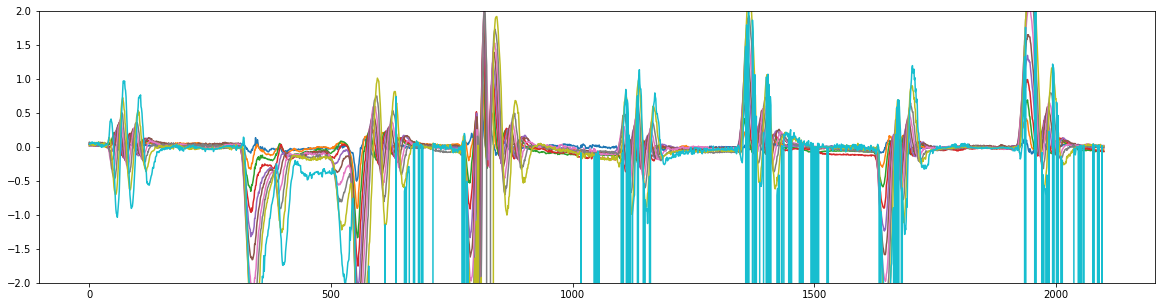

In [23]:
# use tail value as a mask:
tail_angle = df[['tail_angle_'+str(i).zfill(2) for i in range(1,11)]]
tail_angle = tail_angle.values
print(tail_angle.shape)
plt.figure(figsize=(20,5))
plt.plot(np.cumsum(tail_angle[:700*3,:],axis=1)) # Not cumulated!!!!!
plt.ylim(-2,2)

Shape of No Track:
(1828,)


(-2.0, 2.0)

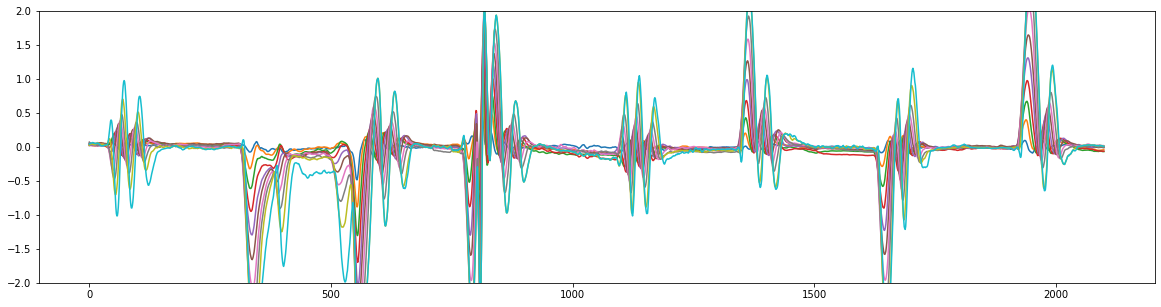

In [24]:
segmentation = InitialSegmentation(tail_angle,fps = 700,Reference_tail_segment = 6,BCFilt = 10,MinFiltSize = 500,MaxFiltSize = 20,Margin_std_noise = 2)

plt.figure(figsize=(20,5))
plt.plot(segmentation.tail_angle_smooth[:700*3,:]) # Not cumulated!!!!!
plt.ylim(-2,2)


0.0692487751546506


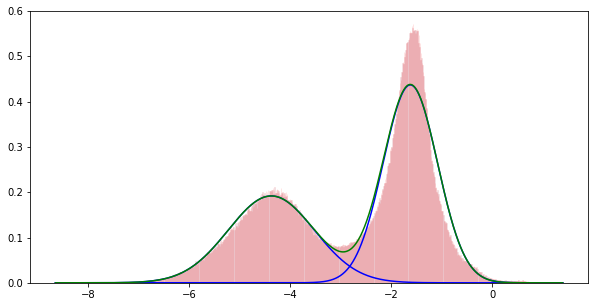

In [25]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
BoutThresh,ax = segmentation.find_activity_threshold(axis=ax)
print(BoutThresh)

onset,offset,tail_active = segmentation.initial_segmentation( Min_Duration = 20 , Min_IBI = 80)


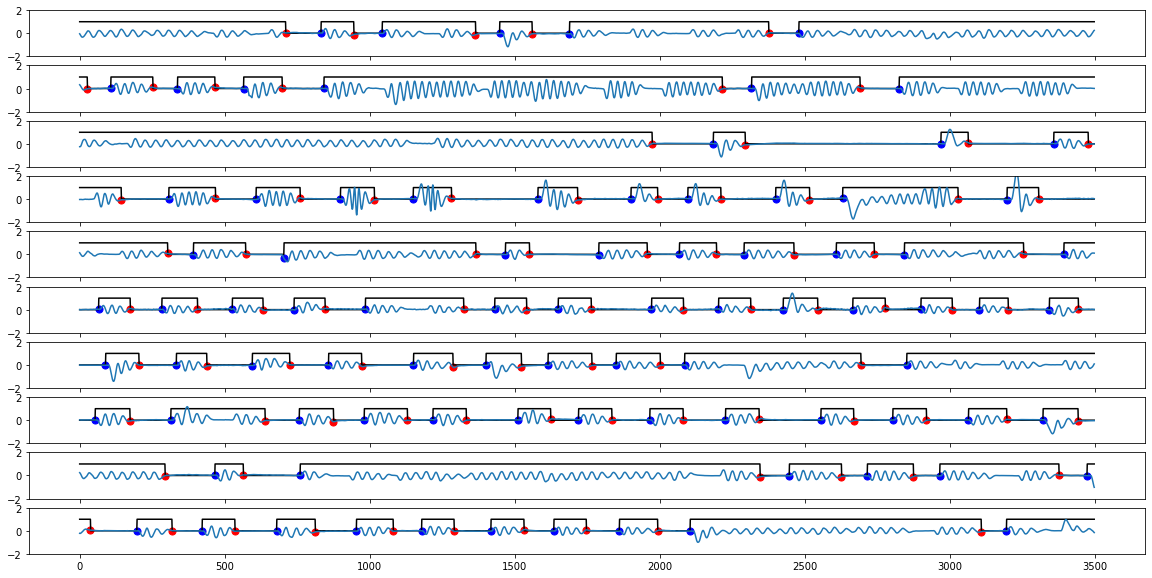

In [26]:
# Diagnostic Plot:
Duration = 700*5
ReferenceSegment=segmentation.Reference_tail_segment

fig, (ax) = plt.subplots(10,1,figsize=(20,10), sharex=True)
for i in range(10):
    IdSt = np.random.randint(segmentation.tail_angle_smooth.shape[0]-Duration)
    ax[i].plot(tail_active[IdSt:IdSt+Duration],'k')
    id = np.where(np.diff(tail_active[IdSt:IdSt+Duration])==1)[0]
    if len(id)>0:
        ax[i].scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='b')
    id = np.where(np.diff(tail_active[IdSt:IdSt+Duration])==-1)[0]
    if len(id)>0:
        ax[i].scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='r')
    ax[i].plot(segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment])
    ax[i].set_ylim(-2,2)
plt.show()


In [27]:
peaks_pos,peaks_neg = segmentation.extract_half_beat(Half_BCFilt = 150, stdThres = 5,MinSizeBlob=500)
onset, offset, tail_active = segmentation.refine_bouts(MaxIBeatI = 50)
duration = [off_-on_ for on_,off_ in zip(onset,offset)]

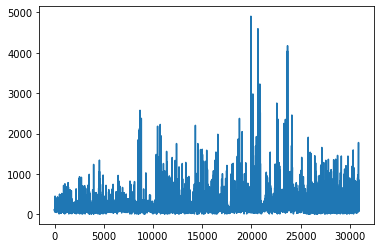

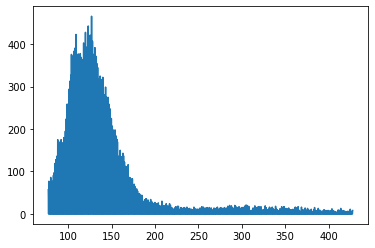

In [28]:
plt.plot(duration)
plt.show()
hist, bins = np.histogram(duration,range=(np.percentile(duration,5),np.percentile(duration,95)),bins = 1000)
plt.plot(0.5*(bins[1:]+bins[0:-1]),hist)


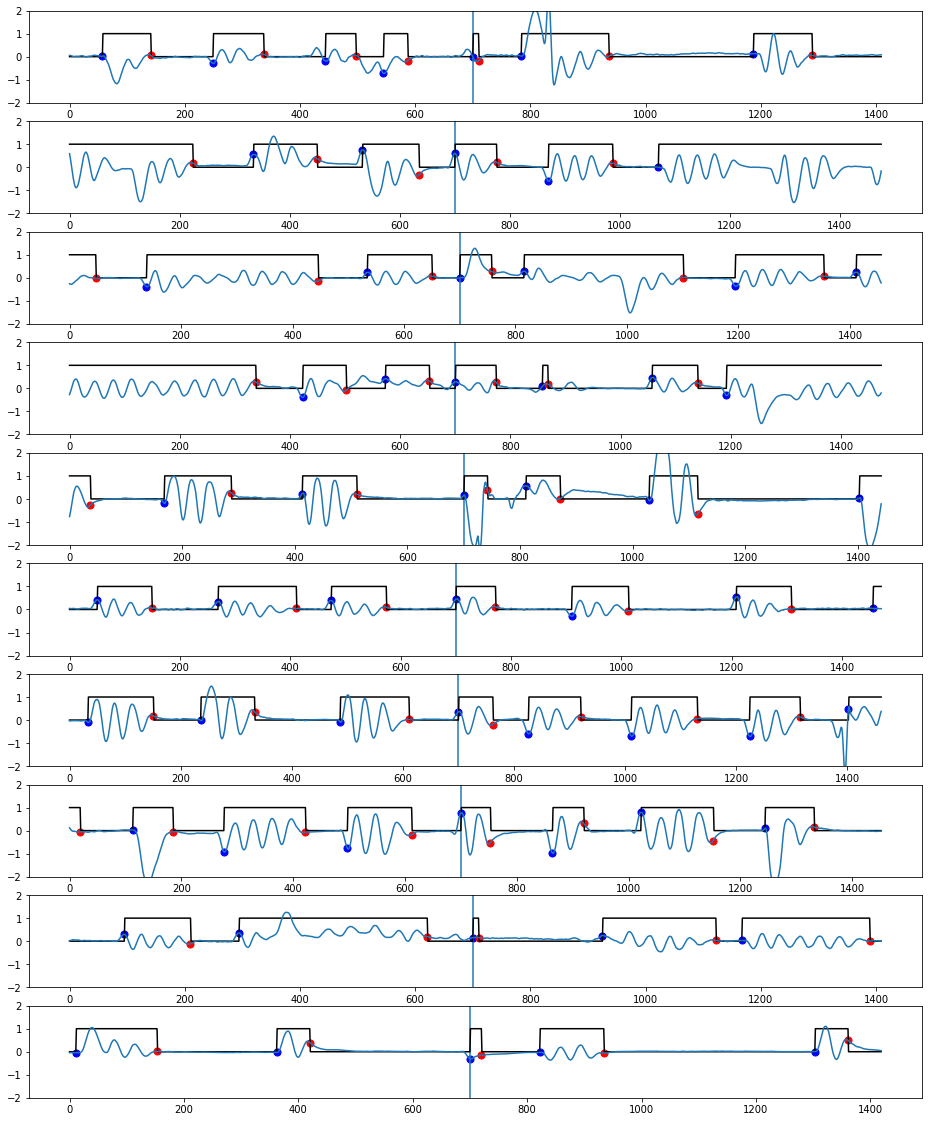

In [29]:
# Random from 5 percentile:
id_bout = np.where(duration<np.percentile(duration,5))[0]
N = 10
id_bout = id_bout[np.random.randint(0,len(id_bout),N)]

ReferenceSegment=segmentation.Reference_tail_segment

fig, (ax) = plt.subplots(N,1,figsize=(16,20), sharex=False)

for i in range(10):

    # Diagnostic Plot:
    IdSt = onset[id_bout[i]]-700#np.random.randint(segmentation.tail_angle_smooth.shape[0]-Duration)
    Duration = (offset[id_bout[i]]-onset[id_bout[i]])+700*2

    ax[i].plot(tail_active[IdSt:IdSt+Duration],'k')
    id = np.where(np.diff(tail_active[IdSt:IdSt+Duration])==1)[0]
    if len(id)>0:
        ax[i].scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='b')
        
    id = np.where(np.diff(tail_active[IdSt:IdSt+Duration])==-1)[0]
    if len(id)>0:
        ax[i].scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='r')
    ax[i].plot(segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment])

    ax[i].vlines(700,-2,2)
    ax[i].set_ylim(-2,2)
plt.show()

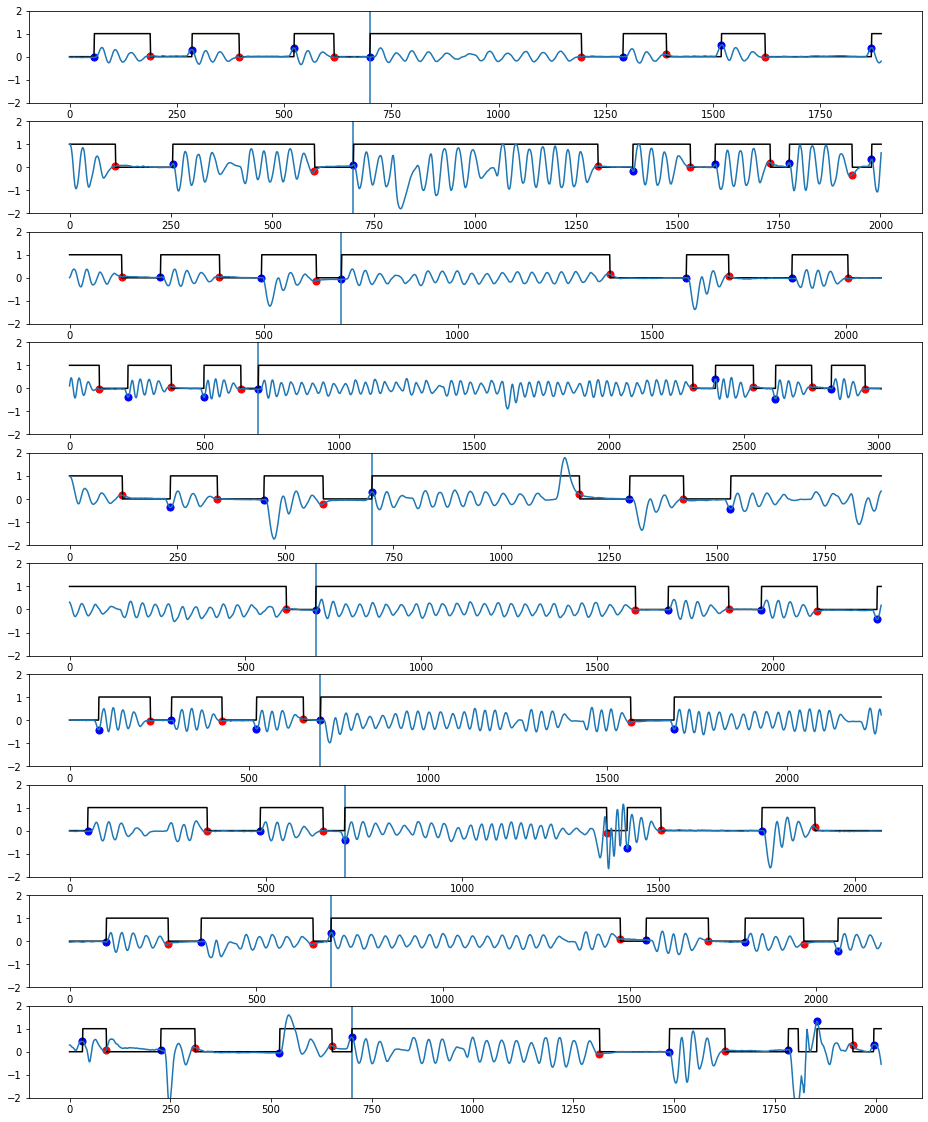

In [30]:
# Random from 5 percentile:
id_bout = np.where(duration>np.percentile(duration,95))[0]
N = 10
id_bout = id_bout[np.random.randint(0,len(id_bout),N)]

ReferenceSegment=segmentation.Reference_tail_segment

fig, (ax) = plt.subplots(N,1,figsize=(16,20), sharex=False)

for i in range(10):
    # Diagnostic Plot:
    IdSt = onset[id_bout[i]]-700#np.random.randint(segmentation.tail_angle_smooth.shape[0]-Duration)
    Duration = (offset[id_bout[i]]-onset[id_bout[i]])+700*2

    ax[i].plot(tail_active[IdSt:IdSt+Duration],'k')
    id = np.where(np.diff(tail_active[IdSt:IdSt+Duration])==1)[0]
    if len(id)>0:
        ax[i].scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='b')
    id = np.where(np.diff(tail_active[IdSt:IdSt+Duration])==-1)[0]
    if len(id)>0:
        ax[i].scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='r')
    ax[i].plot(segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment])
    ax[i].vlines(700,-2,2)

    ax[i].set_ylim(-2,2)
plt.show()

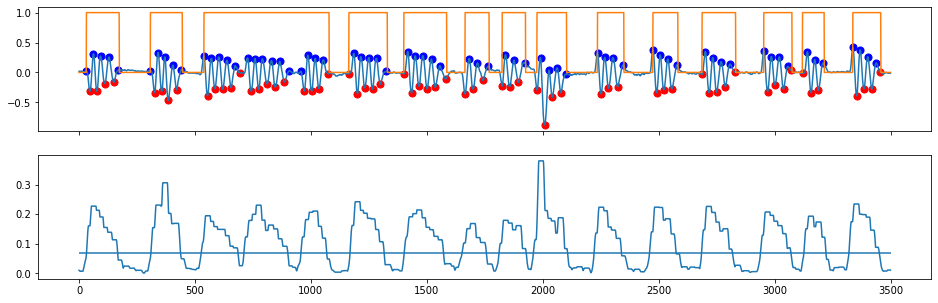

In [31]:
# Diagnostic Plot:
Duration = 700*5
IdSt = 1566387
#IdSt = np.random.randint(segmentation.tail_angle_smooth.shape[0]-Duration)

fig, (ax) = plt.subplots(2,1,figsize=(16,5), sharex=True)

id = peaks_pos[(peaks_pos>IdSt)&(peaks_pos<(IdSt+Duration))]-IdSt
ax[0].scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='b')

id = peaks_neg[(peaks_neg>IdSt)&(peaks_neg<(IdSt+Duration))]-IdSt
ax[0].scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='r')

ax[0].plot(segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment])
ax[0].plot(segmentation.tail_active[IdSt:IdSt+Duration])

ax[1].plot(segmentation.tail_angle_speed_low_pass[IdSt:IdSt+Duration])
ax[1].hlines(BoutThresh,0,Duration)
plt.show()

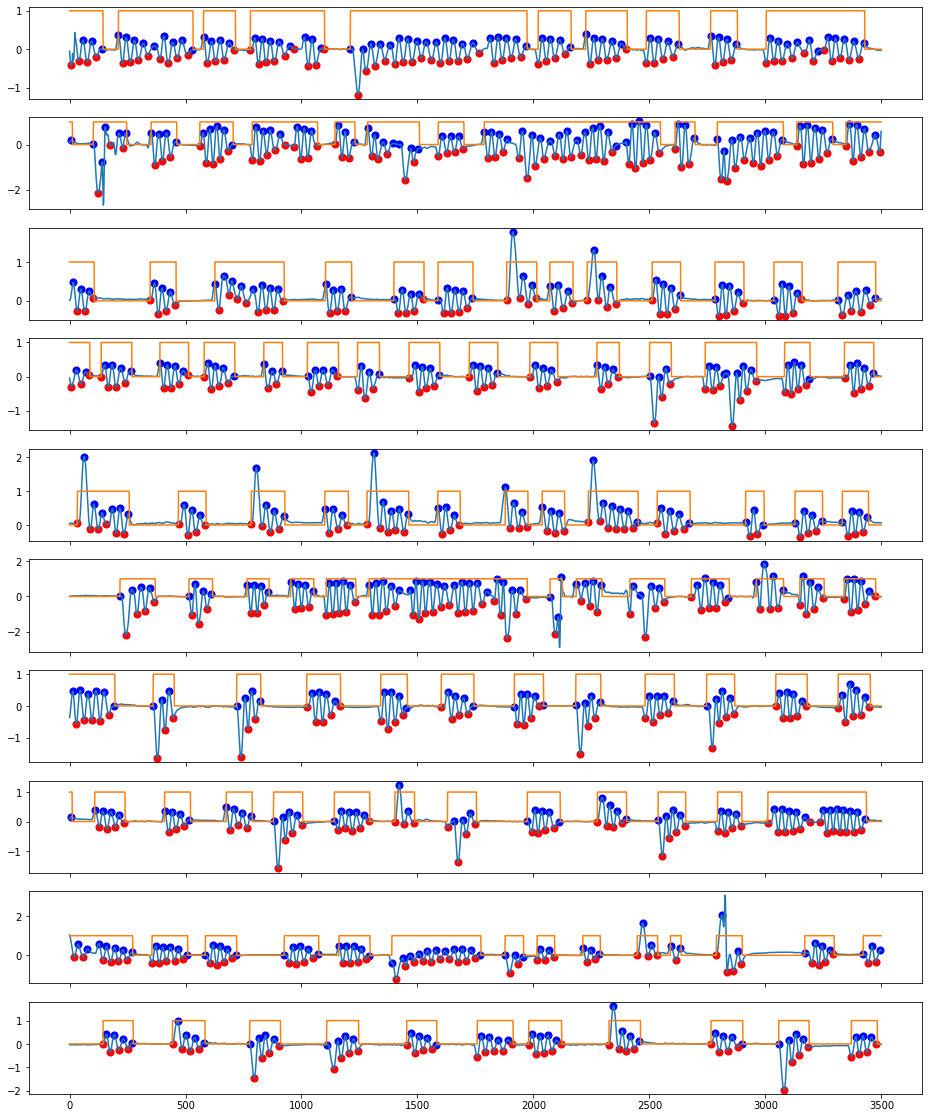

In [32]:
# Diagnostic Plot:
Duration = 700*5
#
N = 10
fig, (ax) = plt.subplots(N,1,figsize=(16,20), sharex=True)
for i in range(N):

    IdSt = np.random.randint(segmentation.tail_angle_smooth.shape[0]-Duration)
    id = peaks_pos[(peaks_pos>IdSt)&(peaks_pos<(IdSt+Duration))]-IdSt
    ax[i].scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='b')

    id = peaks_neg[(peaks_neg>IdSt)&(peaks_neg<(IdSt+Duration))]-IdSt
    ax[i].scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='r')

    ax[i].plot(segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment])
    ax[i].plot(segmentation.tail_active[IdSt:IdSt+Duration])

plt.show()

(1000000, 5)
0
1
2
3
4
rank 12


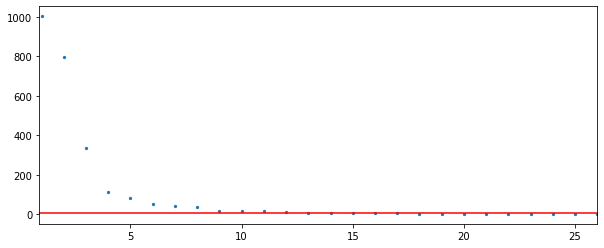

In [34]:
# Improve Segmentation using local linear dynamical system:
from SegmentationLocalLinearDynamicalSystem import LocallyLinearDynamicalSystem

tail = segmentation.tail_angle_smooth[:1000000,2:7]
print(tail.shape)
llds = LocallyLinearDynamicalSystem([i for i in range(0,5,1)])
H,Y = llds.compute_hankel(tail)

fig,ax = plt.subplots(1,1,figsize=(10,4))
ax = llds.compute_singular_value(ax)
plt.show()

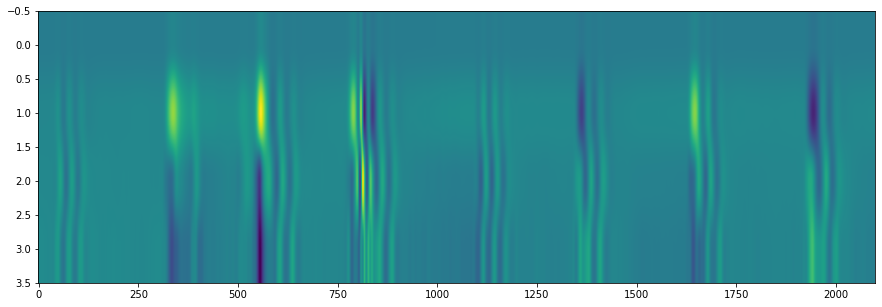

In [35]:
U,V,Sig = llds.compute_singular_vector(4)
plt.figure(figsize=(15,5))
plt.imshow(llds.V[:700*3,:].T,aspect='auto')
plt.show()

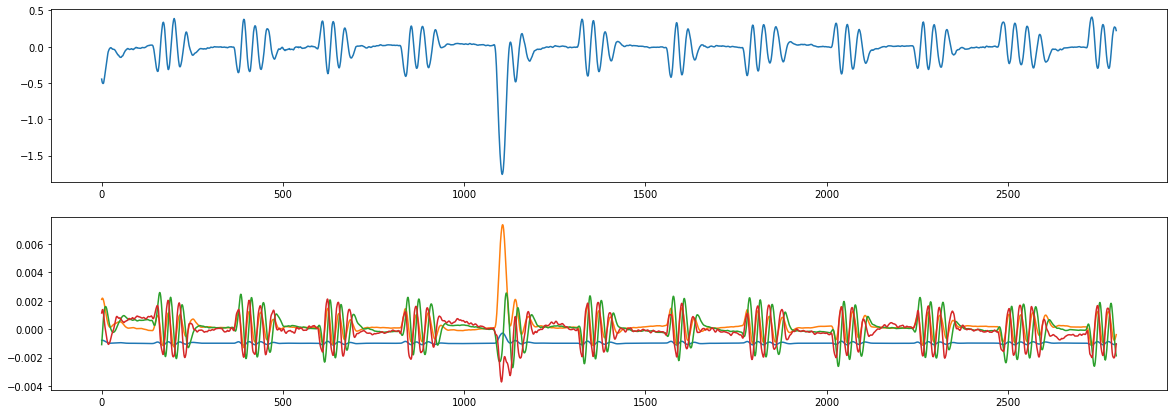

In [36]:
IdSt = np.random.randint(llds.H.shape[1]-Duration)
Duration = 700*4

fig,ax = plt.subplots(2,1,figsize=(20,7))
ax[0].plot(llds.X[IdSt:IdSt+Duration,4])
ax[1].plot(V[IdSt:IdSt+Duration,:])
plt.show()

In [37]:
all_peaks = np.concatenate((segmentation.half_beat_pos,segmentation.half_beat_neg))
all_peaks = np.sort(all_peaks)
#all_peaks = all_peaks-tau
all_peaks = all_peaks[all_peaks<llds.X.shape[0]]

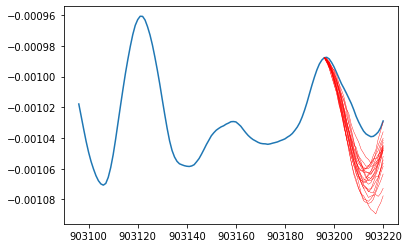

In [38]:
kk = np.random.randint(len(all_peaks))
onset_fit = all_peaks[kk]-100#np.random.randint(H_Prediction_tau.shape[1]-Duration)#1350
offset_fit = all_peaks[kk]#1535
horizon = 25

num_rep = 20
V_monte_carlo = np.zeros((num_rep,horizon,V.shape[1]))
theta = llds.fit_dynamical_system(V[onset_fit:offset_fit,:])
#plt.plot(np.arange(onset_fit,offset_fit+horizon),V[onset_fit:offset_fit+horizon,0])
for i in range(num_rep):
    V_monte_carlo[i,:,:] = llds.predict_recursively(V[offset_fit,:],horizon,theta)
    #plt.plot(np.arange(offset_fit,offset_fit+horizon),V_predicted[:,0],c='r',lw=0.4)

plt.plot(np.arange(onset_fit,offset_fit+horizon),V[onset_fit:offset_fit+horizon,0])
plt.plot(np.arange(offset_fit,offset_fit+horizon),V_monte_carlo[:,:,0].T,c='r',lw=0.4)
plt.show()

5681.5352988164195
5572.997575441039
-108.53772337538066


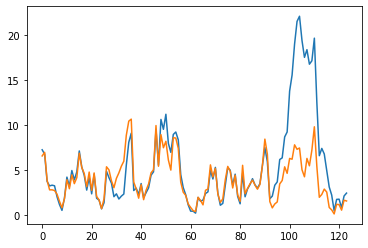

In [39]:
horizon = 25

theta_a = llds.fit_dynamical_system(V[onset_fit:offset_fit,:])
V_b = V[onset_fit:offset_fit+horizon,:].T
likelihood0,volume0,mahal0 = llds.compute_likelihood(theta_a,V_b)

theta_a = llds.fit_dynamical_system(V[onset_fit:offset_fit+horizon,:])
V_b = V[onset_fit:offset_fit+horizon,:].T
likelihood1,volume1,mahal1 = llds.compute_likelihood(theta_a,V_b)

loglikelihood_ratio = likelihood1 - likelihood0

print(likelihood0)
print(likelihood1)
print(loglikelihood_ratio)

plt.plot(mahal0)
plt.plot(mahal1)



In [40]:
peaks_pos,peaks_neg = segmentation.half_beat_pos,segmentation.half_beat_neg

In [ ]:
likelihood_ratio = segmentation.likelihood_ratio_at_peak(peak_loc,margin_time = None, margin_peak = 3)

id_st = peak-3
id_break = peak
id_ed = peak+3
MinDuration

peak_loc,likelihood_ratio = evaluate_break_point(margin_time = None, margin_peak = 3)

likelihood_ratio_threshold = 2*np.percentile(LikeRatio,50)

break_point = peak_loc[likelihood_ratio<likelihood_ratio_threshold]



In [91]:
%%time

peaks_pos = peaks_pos[peaks_pos<llds.X.shape[0]]
peaks_neg = peaks_neg[peaks_neg<llds.X.shape[0]]

print(len(onset))
print(len(offset))

MinDuration = 60
Half_peak = []
LikeRatio = []
n=0
for i in range(len(onset)):
    if i%300==0:
        print(i)
        
    #if (offset[i]-onset[i])>2*MinDuration:
    peak_pos_in_bouts = peaks_pos[(peaks_pos>onset[i])&(peaks_pos<offset[i])]
    peak_neg_in_bouts = peaks_neg[(peaks_neg>onset[i])&(peaks_neg<offset[i])]
    
    all_peaks_in_bouts = np.concatenate((peak_pos_in_bouts,peak_neg_in_bouts))
    all_peaks_in_bouts = np.sort(all_peaks_in_bouts)
    #all_peaks = all_peaks-tau
    if len(all_peaks_in_bouts)>6:
        for peak_0,peak_1 in zip(all_peaks_in_bouts[0:-3],all_peaks_in_bouts[3:]):
            # if peak not too close to beginning and if peak not too close to the end
            if (peak_0-onset[i]>MinDuration) & ((offset[i]-peak_1)>MinDuration):
                
                V_b = V[peak_0-MinDuration:peak_1,:].T
                onset_fit = peak_0-MinDuration
                offset_fit = peak_0
                theta_a = llds.fit_dynamical_system(V[onset_fit:offset_fit,:])
                likelihood0,volume0,mahal0 = llds.compute_likelihood(theta_a,V_b)

                onset_fit = peak_0-MinDuration
                offset_fit = peak_1
                theta_a = llds.fit_dynamical_system(V[onset_fit:offset_fit,:])
                likelihood1,volume1,mahal1 = llds.compute_likelihood(theta_a,V_b)

                loglikelihood_ratio = likelihood1 - likelihood0
                Half_peak.append(0.5*(peak_0+peak_1))
                LikeRatio.append(loglikelihood_ratio)
                n = n + 1

                '''
                V_b = V[peak_0-MinDuration:peak_1,:].T
                onset_fit = peak_0-MinDuration
                offset_fit = peak_0
                theta_a = llds.fit_dynamical_system(V[onset_fit:offset_fit,:])
                V_b = V[peak_0:peak_1,:].T
                likelihood0,volume0,mahal0 = llds.compute_likelihood(theta_a,V_b)
                Half_peak.append(0.5*(peak_0+peak_1))
                LikeRatio.append(likelihood0)
                '''
        #if i>300:
        #    break

        # Fit model from current_peak-50:current_peak
        # Fit model from current_peak-50:next_peak

        # Compute likelihood ratio between the two model
        # Associate likelihood ratio to middle between peak

Half_peak = np.round(np.array(Half_peak)).astype('int')
LikeRatio = np.array(LikeRatio)

30917
30917
0
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7500
7800
8100
8400
8700
9000
9300
9600
9900
10200
10500
10800
11100
11400
11700
12000
12300
12600
12900
13200
13500
13800
14100
14400
14700
15000
15300
15600
15900
16200
16500
16800
17100
17400
17700
18000
18300
18600
18900
19200
19500
19800
20100
20400
20700
21000
21300
21600
21900
22200
22500
22800
23100
23400
23700
24000
24300
24600
24900
25200
25500
25800
26100
26400
26700
27000
27300
27600
27900
28200
28500
28800
29100
29400
29700
30000
30300
30600
30900
Wall time: 7.34 s


In [93]:
7.34/n

0.00239556135770235

In [94]:
3600*3/10


1080.0

In [95]:
1080/60

18.0

In [98]:
18*60/0.002395

450939.4572025052

In [103]:
10.0**3*3*3600/450939.4572025052

23.95

In [106]:
1000/700*15

21.42857142857143

In [107]:
# Detect breakpoint every 15 frames (5 frames??) during bouts

In [ ]:
2.5 sec interval

In [ ]:
# 2 ms per point:
10x of real time -> 3hours -> 18 min ->

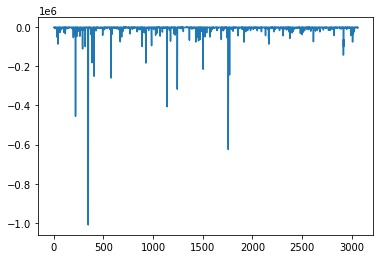

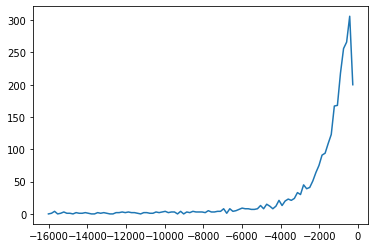

In [84]:
plt.plot(LikeRatio)
plt.show()
hist, bins = np.histogram(LikeRatio,range=(np.percentile(LikeRatio,5),np.percentile(LikeRatio,95)),bins = 100)
plt.plot(bins[1:],hist)


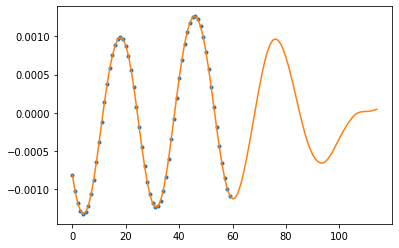

In [85]:
onset_fit = peak_0-MinDuration
offset_fit = peak_0

plt.plot(V[onset_fit:offset_fit,1],'.')

onset_fit = peak_0-MinDuration
offset_fit = peak_1

plt.plot(V[onset_fit:offset_fit,1])

-2373.0455207175373


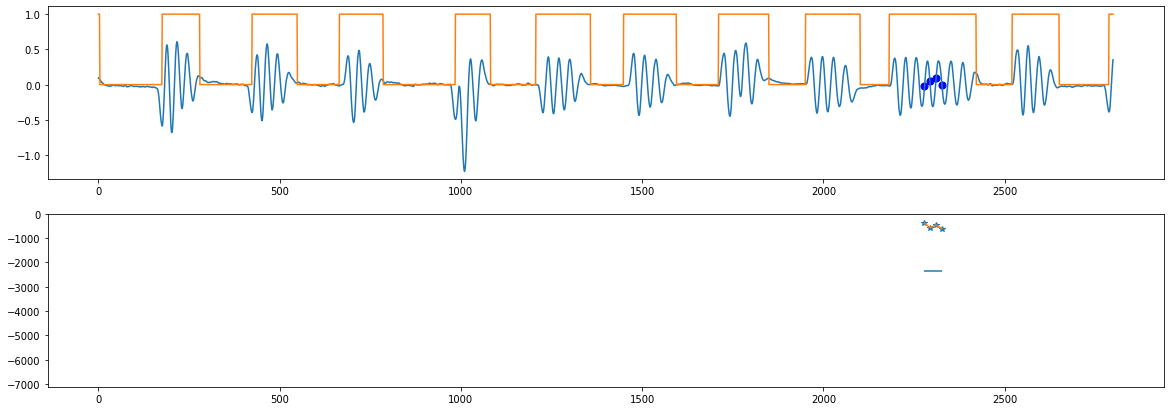

In [90]:
Thresh = np.percentile(LikeRatio,50)*2
print(Thresh)

Duration = 700*4
while True:
    IdSt = np.random.randint(llds.X.shape[0]-Duration)
    id = Half_peak[(Half_peak>IdSt)&(Half_peak<(IdSt+Duration))]-IdSt
    if len(id)>2:
        break

fig = plt.figure(figsize=(20,7))

ax1 = plt.subplot(211)
ax1.plot(segmentation.tail_angle_smooth[IdSt:IdSt+Duration,6])
ax1.plot(segmentation.tail_active[IdSt:IdSt+Duration])

#ax1.plot(llds.V[IdSt:IdSt+Duration,:])
#ax1.scatter(id,llds.V[IdSt:IdSt+Duration,-1][id],s=50,c='b')
ax1.scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,segmentation.Reference_tail_segment][id],s=50,c='b')

ax2 = plt.subplot(212, sharex = ax1)
l = LikeRatio[(Half_peak>IdSt)&(Half_peak<(IdSt+Duration))]

ax2.plot(id,l,'*')
ax2.plot(id,l,'-')
ax2.hlines(Thresh,id[0],id[-1])
#
#
#ax2.hlines(Thresh*10,id[0],id[-1])
# 
ax2.set_ylim(Thresh*3,0)
#ax2.plot()
plt.show()

In [68]:
# For each bouts:

# Is there break_point:

# Find largest break_point start new bouts from break_point:

# Is there more interval left:

# Iterate:



# Segmentation Class:

# Attributes:
* Tail Angle
* Nan Interp Tail Angle
* Smooth Tail Angle
* BoutThresh
* Half Beat Positive, Negative
* Bout Onset, Offset

# Functions:
* Find threshold of activity
* Oversample Bouts
* Find Half Beat
* Clean Half Beat
* Plot Diagnostic: threshold,Half Beat, Smoothing, Bout Segmentation

In [5]:
from utils.utils_bouts import diff_but_better,compute_smooth_tail_angle,compute_tail_speed,mexican_hat_tail_speed,estimate_speed_threshold,find_onset_offset_numpy
from utils.utils_beat import refine_segmentation_bouts,find_zeros_crossing,is_there_oscillation,clean_peak_forcing_distance,clean_peak_forcing_alternation,interleave,is_break_in_amplitude,is_break_in_interbeatinterval,is_there_signal

In [6]:
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy import stats
def estimate_speed_threshold_using_GMM(speed,margin_std,axis=None):
    
    log_speed = np.log(speed[speed>0])
    #bin_log_min = -5
    #bin_log_max = 5
    #count,edge = np.histogram(log_speed,np.arange(bin_log_min,bin_log_max,0.1))
    #bins = (edge[:-1]+edge[1:])/2

    X = log_speed[:,np.newaxis]
    gm = GaussianMixture(n_components=2, random_state=0).fit(X)

    weights = gm.weights_
    means = gm.means_
    covars = gm.covariances_

    id = np.argmin(means)
    sigma  = np.sqrt(covars[id]) # Standard Deviation
    BoutThresh = np.exp(means[id] + margin_std*sigma)[0]
    f_axis = log_speed.copy().ravel()
    f_axis.sort()
    if axis is not None:
        axis.hist(log_speed, bins=1000, histtype='bar', density=True, ec='red', alpha=0.1)
        #axis.plot(bins,count)
        axis.plot(f_axis,weights[0]*stats.norm.pdf(f_axis,means[0],np.sqrt(covars[0])).ravel(), c='blue')
        axis.plot(f_axis,weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(), c='blue')
        axis.plot(f_axis,weights[0]*stats.norm.pdf(f_axis,means[0],np.sqrt(covars[0])).ravel()+weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(),
        c='green')

    return BoutThresh[0],axis


In [7]:

def tail_angle_preprocessing(tail_angle,NumSegments=7,BCFilt=10,MinFiltSize=400,MaxFiltSize=20):

    # Smooth Tail angle and compute measure of intensity
    cumul_tail_angle,smooth_cumul_tail_angle,notrack = compute_smooth_tail_angle(tail_angle)
    smooth_tail_speed,speed_tail_angle,super_cumul = compute_tail_speed(smooth_cumul_tail_angle,notrack,NumSegments,BCFilt)
    
    # MinFilt remove unstable baseline & MaxFilt merge bouts
    low_pass_tail_speed,max_filt,min_filt = mexican_hat_tail_speed(smooth_tail_speed,MinFiltSize,MaxFiltSize)
    
    # Compute Speed:
    tail_angle_speed = np.zeros_like(smooth_cumul_tail_angle)

    for s in range(tail_angle_speed.shape[1]):
        tail_angle_speed[:,s] = diff_but_better(smooth_cumul_tail_angle[:,s],dt=1/700, filter_length=71)
    
    return smooth_cumul_tail_angle,low_pass_tail_speed,tail_angle_speed,notrack

In [8]:
def find_half_beat(bout_slice,Half_BCFilt = 150, stdThres = 5,MinSizeBlob = 500):
    BCFilt = Half_BCFilt*2+1
    X = bout_slice
    oversample_slice = cv2.resize(X, dsize=(X.shape[1],X.shape[0]*10), interpolation=cv2.INTER_CUBIC)
        
    filtered_=np.zeros_like(oversample_slice)
    binary_thresh_up=np.zeros_like(oversample_slice)
    binary_thresh_down=np.zeros_like(oversample_slice)
    for i in range(oversample_slice.shape[1]):
            filtered_[:,i]= signal.convolve(oversample_slice[:,i],1/BCFilt*signal.boxcar(M=BCFilt,sym=True),mode='same')
            sigma = np.std(filtered_[:,i])
            binary_thresh_up[:,i] = filtered_[:,i]+sigma/stdThres
            binary_thresh_down[:,i] = filtered_[:,i]-sigma/stdThres

    binary_image = np.zeros_like(oversample_slice)
    for i in range(oversample_slice.shape[1]):
        binary_image[:,i] = (oversample_slice[:,i]>binary_thresh_up[:,i]) + -1*(oversample_slice[:,i]<binary_thresh_down[:,i])
    
    all_labels_pos = measure.label((binary_image)==1)
    if len(np.where(all_labels_pos)[0])>0:
        props_pos = regionprops_table(all_labels_pos, properties=('area','centroid'))#,
        half_beat_pos = []
        for i,lab_ in enumerate(np.unique(all_labels_pos)[1:]):
            if props_pos['area'][i]> MinSizeBlob:
                id = np.where(all_labels_pos[:,-1]==lab_)[0]
                #np.argmax(res[id,8])
                if len(id)>0:
                    half_beat_pos.append(id[np.argmax(oversample_slice[id,-1])])
    else:
        half_beat_pos = []

    all_labels_neg = measure.label((binary_image)==-1)
    if len(np.where(all_labels_neg)[0])>0:
        props_neg = regionprops_table(all_labels_neg, properties=('area','centroid'))
        half_beat_neg = []
        for i,lab_ in enumerate(np.unique(all_labels_neg)[1:]):
            if props_neg['area'][i]> MinSizeBlob:
                id = np.where(all_labels_neg[:,-1]==lab_)[0]
                #np.argmax(res[id,8])
                if len(id)>0:
                    half_beat_neg.append(id[np.argmin(oversample_slice[id,-1])])
    else:
        half_beat_neg = []

    half_beat_pos = np.floor(np.array(half_beat_pos)/10).astype('int')
    half_beat_neg = np.floor(np.array(half_beat_neg)/10).astype('int')

    return half_beat_pos,half_beat_neg,binary_image

In [9]:
import cv2
import scipy.signal as signal

from skimage import measure
from skimage import filters
from skimage.measure import label, regionprops,regionprops_table


In [10]:
class Segmentation:
    
    def __init__(self,
                 tail_angle, # Input shouldn't be cumulated
                 fps = 700,
                 Reference_tail_segment = 6,
                 BCFilt = 10,
                 MinFiltSize = 400,
                 MaxFiltSize = 20,
                 Margin_std_noise = 2.2
                 ):
        
        self.fps = fps
        self.Reference_tail_segment = Reference_tail_segment
        self.Margin_std_noise = Margin_std_noise

        self.tail_angle = tail_angle

        smooth_cumul_tail_angle,low_pass_tail_speed,tail_angle_speed,notrack = tail_angle_preprocessing(tail_angle,NumSegments=Reference_tail_segment,BCFilt=BCFilt,MinFiltSize=MinFiltSize,MaxFiltSize=MaxFiltSize)

        self.tail_angle_smooth = smooth_cumul_tail_angle
        self.tail_angle_speed_low_pass = low_pass_tail_speed

        self.BoutThresh = None
        self.initial_onset = None
        self.initial_offset = None
        self.initial_tail_active = None
        
        self.half_beat_pos = None
        self.half_beat_neg = None

    def find_activity_threshold(self,axis):
        # Compute threshold based on FWHM of speed distribution
        BoutThresh,axis = estimate_speed_threshold_using_GMM(self.tail_angle_speed_low_pass,self.Margin_std_noise,axis=axis)
        self.BoutThresh = BoutThresh
        return BoutThresh,axis
    
    def initial_segmentation(self,Min_Duration = 80,Min_IBI = 10):
        if self.BoutThresh==None:
            raise Exception('You should first compute the activity threshold using self.find_activity_threshold')
        
        tail_active = (self.tail_angle_speed_low_pass>self.BoutThresh)*1.0

        # Compute Running Average to compute bouts amplitude:
        onset,offset,duration = find_onset_offset_numpy(tail_active==1)
        # Refine Segmentation:
        onset, offset, duration, inter_bouts = refine_segmentation_bouts(onset, offset, Min_Duration, Min_IBI)
        onset, offset = onset.tolist(),offset.tolist()
        self.onset = onset
        self.offset = offset
        self.tail_active = np.zeros_like(tail_active)
        for on_,off_ in zip(onset,offset):
            self.tail_active[on_:off_]=1
        #self.initial_tail_active = tail_active
        return self.onset,self.offset,self.tail_active

    def extract_half_beat(self,Half_BCFilt = 150, stdThres = 5,MinSizeBlob=500):

        peaks_pos = []
        peaks_neg = []

        for i,(on_,off_) in enumerate(zip(self.onset,self.offset)):
            
            bout_slice = segmentation.tail_angle_smooth[on_:off_+10,2:self.Reference_tail_segment+1]
            half_beat_pos,half_beat_neg,binary_image = find_half_beat(bout_slice,Half_BCFilt = Half_BCFilt, stdThres = stdThres,MinSizeBlob=MinSizeBlob)
            
            peaks_pos = peaks_pos + (half_beat_pos+on_).tolist()
            peaks_neg = peaks_neg + (half_beat_neg+on_).tolist()

        peaks_pos = np.array(peaks_pos)
        peaks_neg = np.array(peaks_neg)

        self.half_beat_pos = peaks_pos
        self.half_beat_neg = peaks_neg

        return peaks_pos,peaks_neg
    
    def refine_bouts(self,MaxIBeatI = 50):
        # Easier way : redefined tail active as a series of continuous bouts:
        all_peaks = np.concatenate((self.half_beat_pos,self.half_beat_neg))
        all_peaks = np.sort(all_peaks)
        tail_active = np.zeros_like(segmentation.tail_active)
        for p1,p2 in zip(all_peaks[0:-1],all_peaks[1:]):
            if (p2-p1)<MaxIBeatI:
                tail_active[p1:p2] = 1
            else:
                tail_active[p1-5:p1+5] = 1
        
        # Recompute onset and offset:
        id = np.where(np.diff(tail_active)==1)[0]
        self.onset = id
        id = np.where(np.diff(tail_active)==-1)[0]
        self.offset = id
        self.tail_active = tail_active
        return self.onset,self.offset,self.tail_active


In [11]:
# use tail value as a mask:
tail_angle = df[['tail_angle_'+str(i).zfill(2) for i in range(1,11)]]
tail_angle = tail_angle.values
print(tail_angle.shape)
plt.figure(figsize=(20,5))
plt.plot(np.cumsum(tail_angle[:700*3,:],axis=1)) # Not cumulated!!!!!
plt.ylim(-2,2)

segmentation = InitialSegmentation(tail_angle,fps = 700,Reference_tail_segment = 6,BCFilt = 10,MinFiltSize = 500,MaxFiltSize = 20,Margin_std_noise = 2.)

plt.figure(figsize=(20,5))
plt.plot(segmentation.tail_angle_smooth[:700*3,:]) # Not cumulated!!!!!
plt.ylim(-2,2)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
BoutThresh,ax = segmentation.find_activity_threshold(axis=ax)
print(BoutThresh)

onset,offset,tail_active = segmentation.initial_segmentation( Min_Duration = 20 , Min_IBI = 80)

# Diagnostic Plot:
Duration = 700*5
IdSt = 700*60*5
ReferenceSegment=segmentation.Reference_tail_segment
#IdSt = np.random.randint(low_pass_tail_speed.shape[0]-Duration)

fig, (ax1) = plt.subplots(1,1,figsize=(16,10), sharex=True)
ax1.plot(tail_active[IdSt:IdSt+Duration],'k')
id = np.where(np.diff(tail_active[IdSt:IdSt+Duration])==1)[0]
if len(id)>0:
    ax1.scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='b')
id = np.where(np.diff(tail_active[IdSt:IdSt+Duration])==-1)[0]
if len(id)>0:
    ax1.scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='r')
ax1.plot(segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment])
plt.show()

peaks_pos,peaks_neg = segmentation.extract_half_beat(Half_BCFilt = 150, stdThres = 5,MinSizeBlob=500)
onset, offset, tail_active = segmentation.refine_bouts(MaxIBeatI = 50)

# Diagnostic Plot:
Duration = 700*5
IdSt = 1566387
#IdSt = np.random.randint(segmentation.tail_angle_smooth.shape[0]-Duration)

fig, (ax1) = plt.subplots(1,1,figsize=(16,5), sharex=True)

id = peaks_pos[(peaks_pos>IdSt)&(peaks_pos<(IdSt+Duration))]-IdSt
ax1.scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='b')

id = peaks_neg[(peaks_neg>IdSt)&(peaks_neg<(IdSt+Duration))]-IdSt
ax1.scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment][id],s=50,c='r')

ax1.plot(segmentation.tail_angle_smooth[IdSt:IdSt+Duration,ReferenceSegment])
ax1.plot(segmentation.tail_active[IdSt:IdSt+Duration])

plt.show()

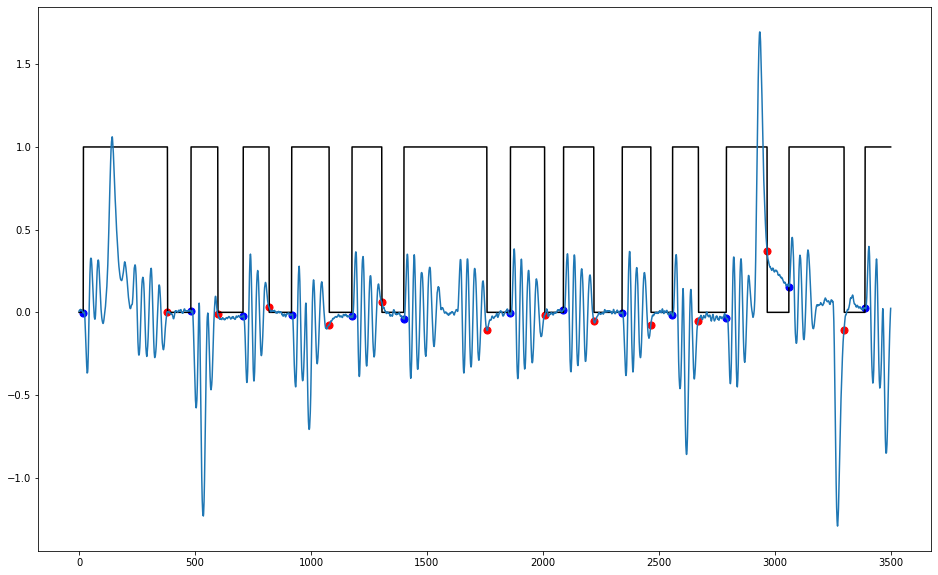

In [63]:
segmentation.tail_angle_smooth.shape

(9232637, 10)

6

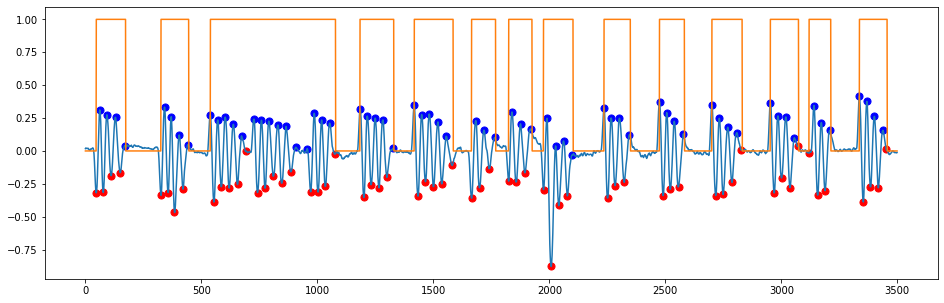

# Locally linear dynamical system:

### Compute Singular vector of the hankel matrix:

#### Attributes:
* X
* hankel
* v
* Half Beat

#### Function:
* Compute hankel
* Compute singular value
* Fit V_k to get theta_k
* Compute likelihood of V_a with theta_b
* Predict from V_k+1 using theta
* Reconstruct X from V



In [69]:
# Compute Hankel:
from scipy.ndimage.interpolation import shift
import scipy 

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

def svht(X, sv=None):
    # svht for sigma unknown
    m,n = sorted(X.shape) # ensures m <= n
    beta = m / n # ratio between 0 and 1
    if sv is None:
        sv = scipy.linalg.svdvals(X)
    sv = np.squeeze(sv)
    omega_approx = 0.56 * beta**3 - 0.95 * beta**2 + 1.82 * beta + 1.43
    return np.median(sv) * omega_approx


In [70]:
class LocallyLinearDynamicalSystem:
    
    def __init__(self,
                 delay):
        
        self.X = None
        self.Y = None
        self.Hankel = None
        self.V = None
        self.delay = delay

    def compute_hankel(self,X):
        H = np.array([])
        H = H.reshape(0,X.shape[0])
        for i in self.delay:
            print(i)
            H = np.concatenate((H,shift(X,(i,0), cval=0).T))#.reshape(NumSeg,tail.shape[0])))
        # Add Intercept:
        H = np.concatenate((H,np.ones_like(H[0,:])[:,np.newaxis].T))#.reshape(NumSeg,tail.shape[0])))
        
        Y = shift(H,(0,-1), cval=0) 
        
        self.X = X
        self.Y = Y
        self.H = H
        return H,Y

    
    def compute_singular_value(self,axis=None):
        # determine rank-reduction
        sv = scipy.linalg.svdvals(self.H)
        tau = svht(self.H, sv=sv)
        r = sum(sv > tau)
        print("rank",r)
        axis.scatter(range(1, len(sv)+1), sv, s=5)
        axis.axhline(tau, c='r')
        axis.set_xlim([0.9,min(len(sv),100)])
        return r,axis

    def compute_singular_vector(self,truncate):
        U2,Sig2,Vh2 = np.linalg.svd(self.H, False) # SVD of input matrix
        r = len(Sig2) if truncate is None else truncate # rank truncation
        self.r = r
        U = U2[:,:r]
        Sig = np.diag(Sig2)[:r,:r]
        V = Vh2.conj().T[:,:r]
        self.U = U
        self.V = V
        self.Sig = Sig
        return U,V,Sig
    
    def reconstruct_X(self,V_):
        H_predicted = self.U@self.Sig@V_
        return H_predicted#[:self.X.shape[0],:]

    def fit_dynamical_system(self,V_):
        V_past = V_[0:-1,:]
        V_future = V_[1:,:]
        all_ones = np.ones(V_past.shape[0])[:,np.newaxis]
        V_past_w_intercept =  np.concatenate((all_ones.T,V_past.T)).T
        res = np.linalg.lstsq(V_past_w_intercept,V_future,rcond=None)
        A_fromV,residual = res[0].T,res[1] # Transpose is crutial to match Atil
        Prediction = A_fromV.dot(V_past_w_intercept.T)
        # Compute Covariance of noise:
        c = A_fromV[:,0]
        A = A_fromV[:,1:]
        noise = V_future - Prediction.T
        covariance_noise = (noise.T.dot(noise))/noise.shape[0]
        theta = (c,A,covariance_noise)
        return theta


    def predict_recursively(self,V0,horizon,theta):
        c = theta[0]
        A = theta[1]
        covariance_noise = theta[2]
        noise_sim = np.random.multivariate_normal(np.zeros(covariance_noise.shape[1]), covariance_noise, size=horizon, check_valid='warn', tol=1e-8)
        V_predicted = np.zeros((horizon,len(V0)))
        V_predicted[0,:] = V0
        for i in range(1,horizon):
            V_predicted[i,:] = c + A@V_predicted[i-1,:] + noise_sim[i,:]
        return V_predicted
    
    #def run_monte_carlo(V0,horizon,c,A,covariance_noise,n):
    def compute_likelihood(self,theta_a,V_b):
                
        V_past = V_b[:,0:-1]
        V_future = V_b[:,1:]

        V_future_pred = np.repeat(theta_a[0][:,np.newaxis],V_past.shape[1],axis=1)+ theta_a[1].dot(V_past) 
        error = V_future-V_future_pred

        det_sigma_a = np.linalg.det(theta_a[2])
        d = len(theta_a[0])
        volume = np.log(np.power(2*np.pi,d)*det_sigma_a)
        precision = np.linalg.inv(theta_a[2])
        mahal = (error.T.dot(precision)*error.T).sum(axis=1)
        likelihood = -1/2 * np.sum(volume-mahal)
        # Careful on the sign (volume + mahal() or (volume - mahal) wikipedia different from article
        return likelihood,volume,mahal

        

In [71]:
tail = segmentation.tail_angle_smooth[:1000000,2:7]
print(tail.shape)
llds = LocallyLinearDynamicalSystem([i for i in range(0,5,1)])
H,Y = llds.compute_hankel(tail)

fig,ax = plt.subplots(1,1,figsize=(10,4))
ax = llds.compute_singular_value(ax)
plt.show()

U,V,Sig = llds.compute_singular_vector(4)

plt.figure(figsize=(15,5))
plt.imshow(llds.V[:700*3,:].T,aspect='auto')
plt.show()

IdSt = np.random.randint(llds.H.shape[1]-Duration)
Duration = 700*4

fig,ax = plt.subplots(2,1,figsize=(20,7))
ax[0].plot(llds.X[IdSt:IdSt+Duration,4])

ax[1].plot(V[IdSt:IdSt+Duration,:])
plt.show()


(1000000, 5)
0
1
2
3
4


rank 12


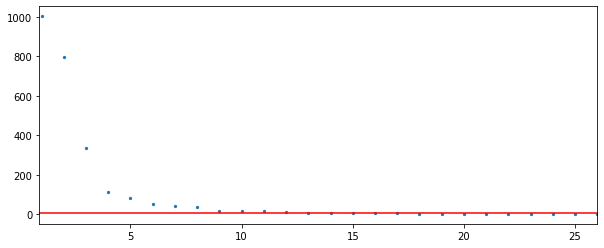

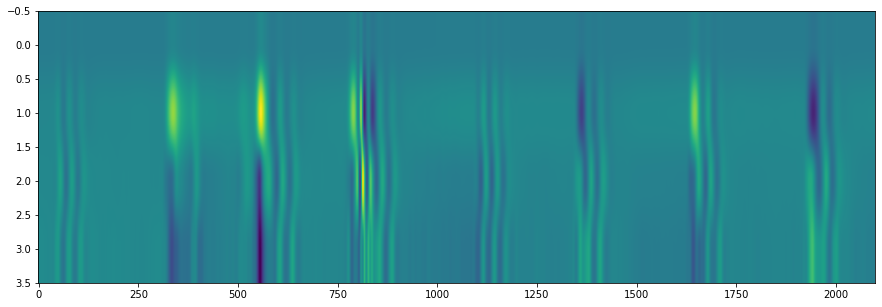

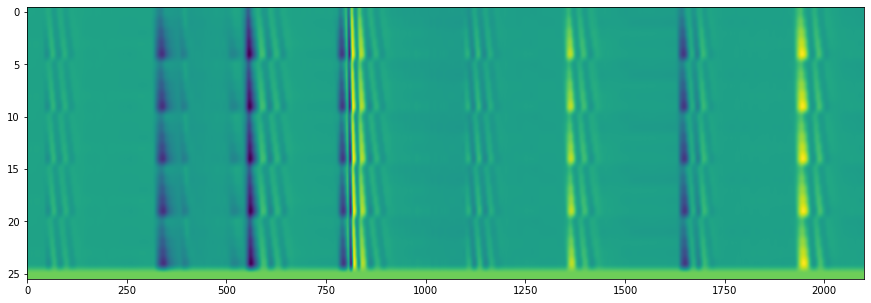

In [75]:
plt.figure(figsize=(15,5))
plt.imshow(llds.H[:,:700*3],aspect='auto')
plt.show()

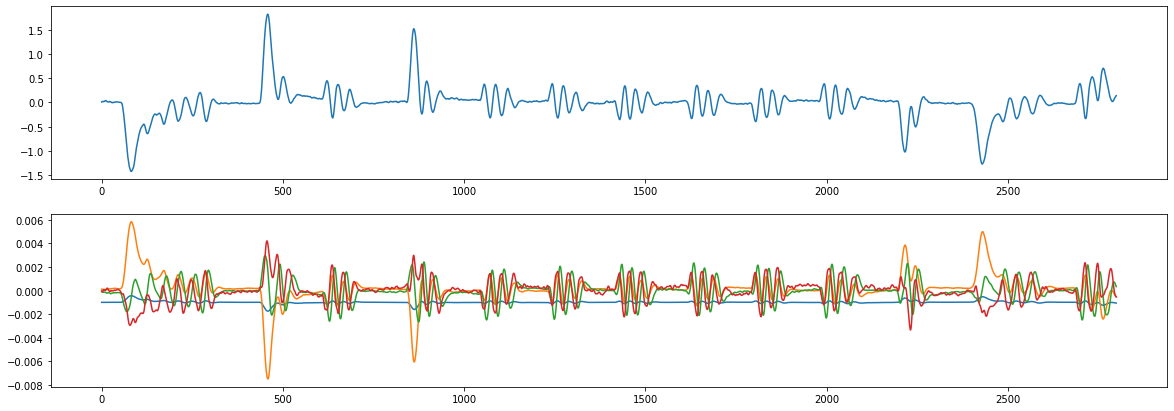

In [200]:
IdSt = np.random.randint(llds.H.shape[1]-Duration)
Duration = 700*4

fig,ax = plt.subplots(2,1,figsize=(20,7))
ax[0].plot(llds.X[IdSt:IdSt+Duration,4])

ax[1].plot(V[IdSt:IdSt+Duration,:])
plt.show()

In [201]:
all_peaks = np.concatenate((segmentation.half_beat_pos,segmentation.half_beat_neg))
all_peaks = np.sort(all_peaks)
#all_peaks = all_peaks-tau
all_peaks = all_peaks[all_peaks<llds.X.shape[0]]

In [202]:
%%time
kk = np.random.randint(len(all_peaks))
onset_fit = all_peaks[kk]-100#np.random.randint(H_Prediction_tau.shape[1]-Duration)#1350
offset_fit = all_peaks[kk]#1535
horizon = 25

num_rep = 20
V_monte_carlo = np.zeros((num_rep,horizon,V.shape[1]))
theta = llds.fit_dynamical_system(V[onset_fit:offset_fit,:])
#plt.plot(np.arange(onset_fit,offset_fit+horizon),V[onset_fit:offset_fit+horizon,0])
for i in range(num_rep):
    V_monte_carlo[i,:,:] = llds.predict_recursively(V[offset_fit,:],horizon,theta)
    #plt.plot(np.arange(offset_fit,offset_fit+horizon),V_predicted[:,0],c='r',lw=0.4)

Wall time: 16 ms


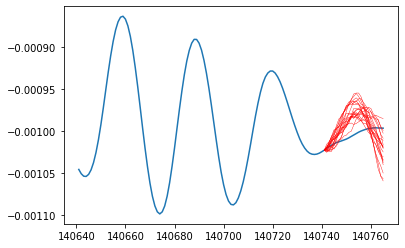

In [204]:
plt.plot(np.arange(onset_fit,offset_fit+horizon),V[onset_fit:offset_fit+horizon,0])
plt.plot(np.arange(offset_fit,offset_fit+horizon),V_monte_carlo[:,:,0].T,c='r',lw=0.4)
plt.show()

In [205]:
%%time
horizon = 25

theta_a = llds.fit_dynamical_system(V[onset_fit:offset_fit,:])
V_b = V[onset_fit:offset_fit+horizon,:].T
likelihood0,volume0,mahal0 = llds.compute_likelihood(theta_a,V_b)

theta_a = llds.fit_dynamical_system(V[onset_fit:offset_fit+horizon,:])
V_b = V[onset_fit:offset_fit+horizon,:].T
likelihood1,volume1,mahal1 = llds.compute_likelihood(theta_a,V_b)

loglikelihood_ratio = likelihood1 - likelihood0

print(likelihood0)
print(likelihood1)
print(loglikelihood_ratio)

5619.656909161028
5649.3150665949015
29.658157433873384
Wall time: 2 ms


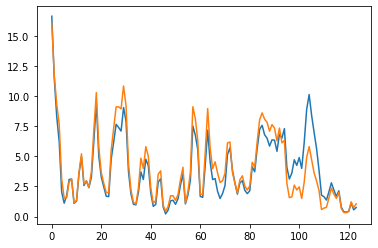

In [206]:
plt.plot(mahal0)
plt.plot(mahal1)

In [207]:
# Compute loglikelihood ratio for halfbeat:

# Min Duration: 80 frames

# For all bouts: bouts < 2*MinDuration => Only room for one bouts

# if longer than 2*MinDuration => after 80 frames evaluate log likelihood ratio for adding half beat (model always fit the last 80 ms)

In [208]:
llds.X.shape

(1000000, 5)

In [209]:
peaks_pos,peaks_neg = segmentation.half_beat_pos,segmentation.half_beat_neg

In [210]:
peaks_pos = peaks_pos[peaks_pos<llds.X.shape[0]]
peaks_neg = peaks_neg[peaks_neg<llds.X.shape[0]]

print(len(onset))
print(len(offset))

MinDuration = 70
Half_peak = []
LikeRatio = []
for i in range(len(onset)):
    if i%300==0:
        print(i)
        
    #if (offset[i]-onset[i])>2*MinDuration:
    peak_pos_in_bouts = peaks_pos[(peaks_pos>onset[i])&(peaks_pos<offset[i])]
    peak_neg_in_bouts = peaks_neg[(peaks_neg>onset[i])&(peaks_neg<offset[i])]
    
    all_peaks_in_bouts = np.concatenate((peak_pos_in_bouts,peak_neg_in_bouts))
    all_peaks_in_bouts = np.sort(all_peaks_in_bouts)
    #all_peaks = all_peaks-tau
    if len(all_peaks_in_bouts)>6:
        for peak_0,peak_1 in zip(all_peaks_in_bouts[0:-3],all_peaks_in_bouts[3:]):
            # if peak not too close to beginning and if peak not too close to the end
            if (peak_0-onset[i]>MinDuration) & ((offset[i]-peak_1)>MinDuration):
                
                V_b = V[peak_0-MinDuration:peak_1,:].T
                onset_fit = peak_0-MinDuration
                offset_fit = peak_0
                theta_a = llds.fit_dynamical_system(V[onset_fit:offset_fit,:])
                likelihood0,volume0,mahal0 = llds.compute_likelihood(theta_a,V_b)

                onset_fit = peak_0-MinDuration
                offset_fit = peak_1
                theta_a = llds.fit_dynamical_system(V[onset_fit:offset_fit,:])
                likelihood1,volume1,mahal1 = llds.compute_likelihood(theta_a,V_b)

                loglikelihood_ratio = likelihood1 - likelihood0
                Half_peak.append(0.5*(peak_0+peak_1))
                LikeRatio.append(loglikelihood_ratio)
                '''
                V_b = V[peak_0-MinDuration:peak_1,:].T
                onset_fit = peak_0-MinDuration
                offset_fit = peak_0
                theta_a = llds.fit_dynamical_system(V[onset_fit:offset_fit,:])
                V_b = V[peak_0:peak_1,:].T
                likelihood0,volume0,mahal0 = llds.compute_likelihood(theta_a,V_b)
                Half_peak.append(0.5*(peak_0+peak_1))
                LikeRatio.append(likelihood0)
                '''
        #if i>300:
        #    break

        # Fit model from current_peak-50:current_peak
        # Fit model from current_peak-50:next_peak

        # Compute likelihood ratio between the two model
        # Associate likelihood ratio to middle between peak

Half_peak = np.round(np.array(Half_peak)).astype('int')
LikeRatio = np.array(LikeRatio)

30929
30929
0
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7500
7800
8100
8400
8700
9000
9300
9600
9900
10200
10500
10800
11100
11400
11700
12000
12300
12600
12900
13200
13500
13800
14100
14400
14700
15000
15300
15600
15900
16200
16500
16800
17100
17400
17700
18000
18300
18600
18900
19200
19500
19800
20100
20400
20700
21000
21300
21600
21900
22200
22500
22800
23100
23400
23700
24000
24300
24600
24900
25200
25500
25800
26100
26400
26700
27000
27300
27600
27900
28200
28500
28800
29100
29400
29700
30000
30300
30600
30900


In [211]:
np.percentile(LikeRatio,5),np.percentile(LikeRatio,95)

(-9106.961070936999, -163.36278087772027)

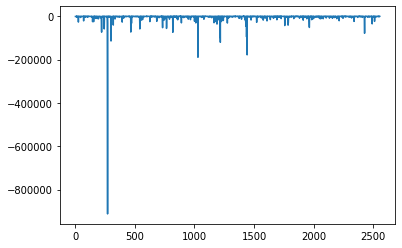

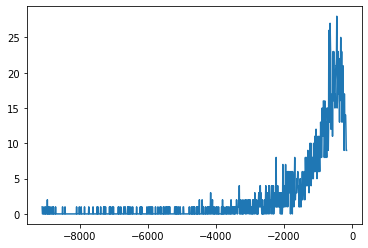

In [212]:
plt.plot(LikeRatio)
plt.show()
hist, bins = np.histogram(LikeRatio,range=(np.percentile(LikeRatio,5),np.percentile(LikeRatio,95)),bins = 1000)
plt.plot(bins[1:],hist)

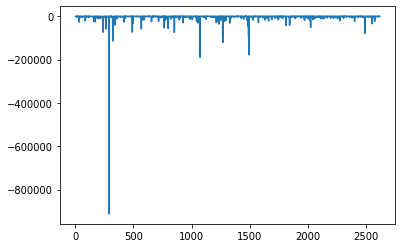

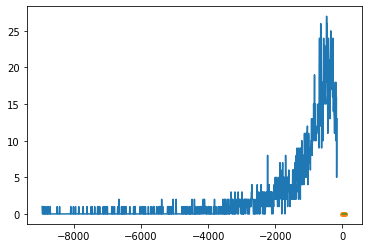

In [46]:
plt.plot(LikeRatio)
plt.show()
hist, bins = np.histogram(LikeRatio,range=(np.percentile(LikeRatio,5),np.percentile(LikeRatio,95)),bins = 1000)
plt.plot(bins[1:],hist)

onset_fit = peak_0-MinDuration
offset_fit = peak_0

plt.plot(V[onset_fit:offset_fit,1],'.')

onset_fit = peak_0-MinDuration
offset_fit = peak_1

plt.plot(V[onset_fit:offset_fit,1])


-1577.97231746768


In [215]:
# Diagnostic Plot:

# Bout detection (Pick long bouts very short and average distance)

# Half Beat detection => Check distribution of inter-beat interval

# Likelihood ratio (sort breakpoint by likelihood ration value)


(-4733.91695240304, 0.0)

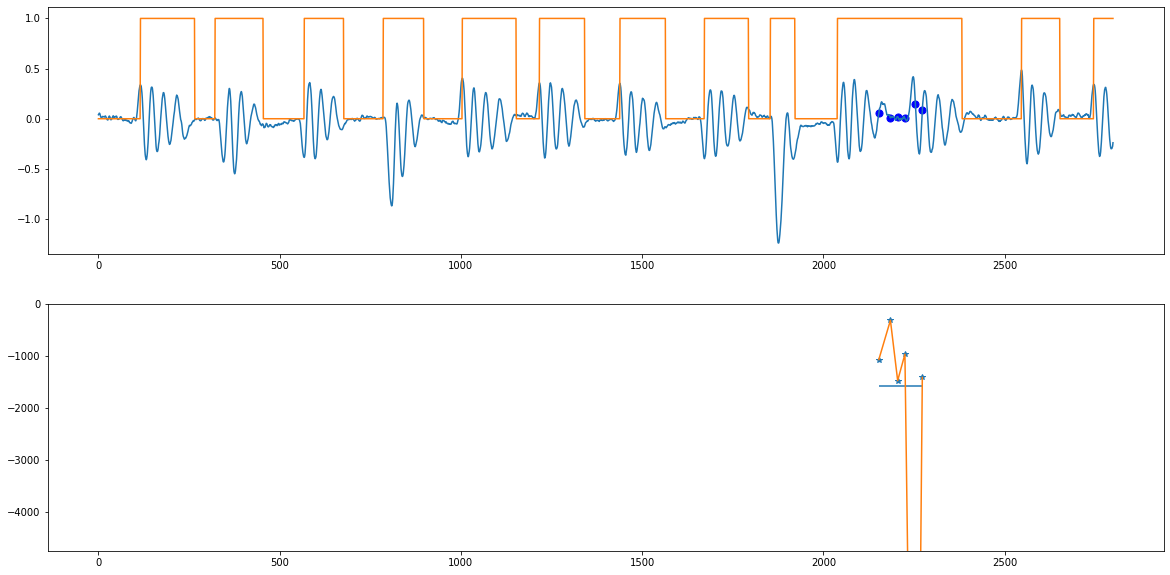

In [216]:
Thresh = np.percentile(LikeRatio,50)*2
print(Thresh)

Duration = 700*4
while True:
    IdSt = np.random.randint(llds.X.shape[0]-Duration)
    id = Half_peak[(Half_peak>IdSt)&(Half_peak<(IdSt+Duration))]-IdSt
    if len(id)>2:
        break

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot(211)
ax1.plot(segmentation.tail_angle_smooth[IdSt:IdSt+Duration,6])
ax1.plot(segmentation.tail_active[IdSt:IdSt+Duration])

#ax1.plot(llds.V[IdSt:IdSt+Duration,:])
#ax1.scatter(id,llds.V[IdSt:IdSt+Duration,-1][id],s=50,c='b')
ax1.scatter(id,segmentation.tail_angle_smooth[IdSt:IdSt+Duration,6][id],s=50,c='b')

ax2 = plt.subplot(212, sharex = ax1)
l = LikeRatio[(Half_peak>IdSt)&(Half_peak<(IdSt+Duration))]

ax2.plot(id,l,'*')
ax2.plot(id,l,'-')
ax2.hlines(Thresh,id[0],id[-1])
#
#
#ax2.hlines(Thresh*10,id[0],id[-1])

# 
ax2.set_ylim(Thresh*3,0)
#ax2.plot()


In [217]:
# Test on synthetic signal (change of frequency, change  of amplitude, intermitent forcing)

In [ ]:
# For each bout
# Start with peak with maximum
# From baseline before maximum define new bout start
# Label bout after onset
# If segment between breakpoint longer than minbouts => Iterate...


In [ ]:
# For DTW computation:

# Lenght compare (L)
# Slide the two bouts and compute distance (dtw? or euclidean): define distance as minimal distance along sliding windows

# 

## Compute statistical test on likelihood ratio:



In [ ]:
# start_interval, total_interval

# compute theta_start_interval
# compute theta_total_interval

# compute likelihood ratio of actual trajectory
# compute likelihood ratio of simulated trajectory 

# Why ratio and not just likelihood of trajectory given starting theta???? Send email to Antonio Costa


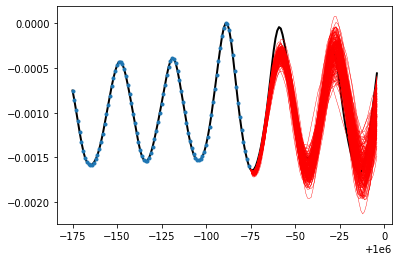

In [301]:
start_interval = (peak_0-MinDuration,peak_0)
end_interval = (peak_0,peak_1)
total_interval = (peak_0-MinDuration,peak_1)

theta_0 = llds.fit_dynamical_system(V[start_interval[0]:start_interval[1],:])
theta_1 = llds.fit_dynamical_system(V[total_interval[0]:total_interval[1],:])

likelihood0,_,_ = llds.compute_likelihood(theta_0,V[end_interval[0]:end_interval[1],:].T)
likelihood1,_,_ = llds.compute_likelihood(theta_1,V[end_interval[0]:end_interval[1],:].T)
likelihood_ratio = likelihood1-likelihood0

# Simulate trajectory and compute their likelihood ratio:

num_rep = 200
horizon = peak_1 - peak_0
V_monte_carlo = np.zeros((num_rep,horizon,V.shape[1]))
sim_likelihood_ratio = np.zeros(num_rep)

#plt.plot(np.arange(onset_fit,offset_fit+horizon),V[onset_fit:offset_fit+horizon,0])
for i in range(num_rep):
    V_monte_carlo[i,:,:] = llds.predict_recursively(V[offset_fit,:],horizon,theta_0)
    #plt.plot(np.arange(offset_fit,offset_fit+horizon),V_predicted[:,0],c='r',lw=0.4)
    
    theta_s1 = llds.fit_dynamical_system(V_monte_carlo[i,:,:])

    likelihood0,_,_ = llds.compute_likelihood(theta_0, V_monte_carlo[i,:,:].T)
    likelihood1,_,_ = llds.compute_likelihood(theta_s1, V_monte_carlo[i,:,:].T)
    sim_likelihood_ratio[i] = likelihood1-likelihood0

plt.plot(np.arange(total_interval[0],total_interval[1]),V[total_interval[0]:total_interval[1],1],lw=2,c='k')
plt.plot(np.arange(start_interval[0],start_interval[1]),V[start_interval[0]:start_interval[1],1],'.')
plt.plot(np.arange(peak_0,peak_1),V_monte_carlo[:,:,1].T,c='r',lw=0.4)
plt.show()


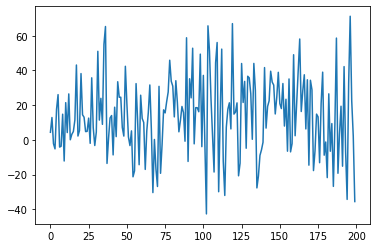

In [302]:
plt.plot(sim_likelihood_ratio)

-217.84512915726327


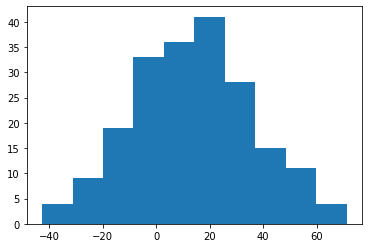

In [303]:
plt.hist(sim_likelihood_ratio)
print(likelihood_ratio)
#lt.scatter(likelihood_ratio,0)
plt.show()

In [ ]:
V_b = V[peak_0-MinDuration:peak_1,:].T

onset_fit = peak_0-MinDuration
offset_fit = peak_0
theta_a = llds.fit_dynamical_system(V[onset_fit:offset_fit,:])
likelihood0,volume0,mahal0 = llds.compute_likelihood(theta_a,V_b)


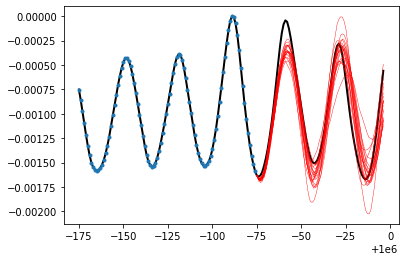

In [280]:

onset_fit = 
offset_fit = 

plt.plot(np.arange(onset_fit,offset_fit),V[onset_fit:offset_fit,1],lw=2,c='k')


onset_fit = peak_0-MinDuration
offset_fit = peak_0

plt.plot(np.arange(onset_fit,offset_fit),V[onset_fit:offset_fit,1],'.')

horizon = peak_1 - peak_0
num_rep = 20
V_monte_carlo = np.zeros((num_rep,horizon,V.shape[1]))
distrib_likelihood_ratio = np.zeros(num_rep)

#plt.plot(np.arange(onset_fit,offset_fit+horizon),V[onset_fit:offset_fit+horizon,0])
for i in range(num_rep):
    V_monte_carlo[i,:,:] = llds.predict_recursively(V[offset_fit,:],horizon,theta)
    #plt.plot(np.arange(offset_fit,offset_fit+horizon),V_predicted[:,0],c='r',lw=0.4)
    likelihood_sim,_,_ = llds.compute_likelihood(theta,V_monte_carlo[i,:,:].T)
    distrib_likelihood_ratio[i] = 0

plt.plot(np.arange(peak_0,peak_1),V_monte_carlo[:,:,1].T,c='r',lw=0.4)

plt.show()

# Distance between Monte-Carlo 

In [ ]:
# 

In [265]:
%%time
kk = np.random.randint(len(all_peaks))
onset_fit = all_peaks[kk]-100#np.random.randint(H_Prediction_tau.shape[1]-Duration)#1350
offset_fit = all_peaks[kk]#1535
horizon = 100

num_rep = 20
V_monte_carlo = np.zeros((num_rep,horizon,V.shape[1]))
theta = llds.fit_dynamical_system(V[onset_fit:offset_fit,:])
#plt.plot(np.arange(onset_fit,offset_fit+horizon),V[onset_fit:offset_fit+horizon,0])
for i in range(num_rep):
    V_monte_carlo[i,:,:] = llds.predict_recursively(V[offset_fit,:],horizon,theta)
    #plt.plot(np.arange(offset_fit,offset_fit+horizon),V_predicted[:,0],c='r',lw=0.4)

Wall time: 31 ms


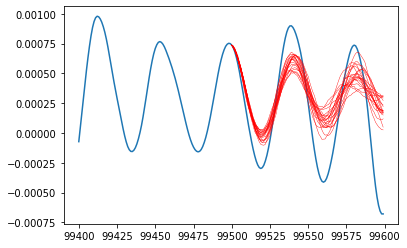

In [266]:
plt.plot(np.arange(onset_fit,offset_fit+horizon),V[onset_fit:offset_fit+horizon,0])
plt.plot(np.arange(offset_fit,offset_fit+horizon),V_monte_carlo[:,:,0].T,c='r',lw=0.4)
plt.show()

 x.T * A * y 
https://stackoverflow.com/questions/18541851/calculate-vt-a-v-for-a-matrix-of-vectors-v/18542314#18542314


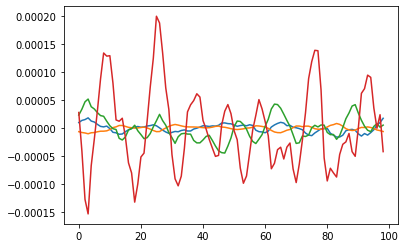

In [163]:
plt.plot(error.T)

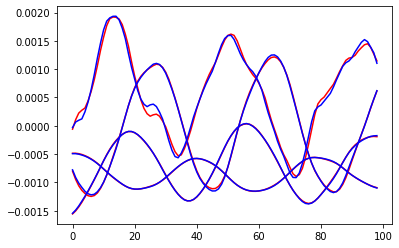

In [160]:
plt.plot(tmp.T,'r')
plt.plot(V_future.T,'b')

In [ ]:
plt.imshow

In [138]:
V_past.shape

(4, 99)

In [142]:
tmp.shape

(4, 99)

In [73]:
V_predicted.shape

(100, 4)

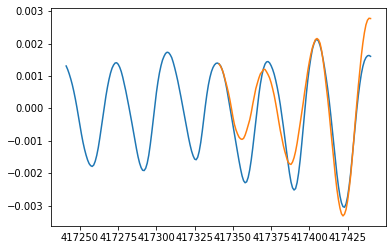

In [38]:
print(V.shape)

(1000000, 4)


In [49]:
offset_fit-onset_fit

100

In [51]:
offset_fit

4878734

In [45]:
V_ = V[onset_fit:offset_fit,:]
V_past = V_[0:-1,:]
V_future = V_[1:,:]

In [46]:
print(V_.shape)

(0, 4)


In [44]:

all_ones = np.ones(V_past.shape[0])[:,np.newaxis]
V_past_w_intercept =  np.concatenate((all_ones.T,V_past.T)).T
print(V_future.shape)
print(V_past_w_intercept.shape)
res = np.linalg.lstsq(V_past_w_intercept,V_future)
print(res)
A_fromV,residual = res[0].T,res[1] # Transpose is crutial to match Atil
Prediction = A_fromV.dot(V_past_w_intercept.T)
# Compute Covariance of noise:
c = A_fromV[:,0]
A = A_fromV[:,1:]
noise = V_future - Prediction.T
covariance_noise = (noise.T.dot(noise))/noise.shape[0]
theta = (c,A,covariance_noise)
print(A)

(0, 4)
(0, 5)
(array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]]), array([], dtype=float64), 0, array([], dtype=float64))
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<ipython-input-44-ba0cc94c6aa6>:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  res = np.linalg.lstsq(V_past_w_intercept,V_future)
<ipython-input-44-ba0cc94c6aa6>:16: RuntimeWarning: invalid value encountered in true_divide
  covariance_noise = (noise.T.dot(noise))/noise.shape[0]


In [ ]:
theta[0]

In [ ]:
theta[1]

In [ ]:
V_past.shape

In [ ]:
V_past_w_intercept.shape

In [ ]:

        all_ones = np.ones(V_.shape[0])[:,np.newaxis]
        V_past = V_[0:-1]
        V_future = V_[1:]
        all_ones = np.ones(V_past.shape[0])[:,np.newaxis]
        V_past_w_intercept =  np.concatenate((all_ones.T,V_past.T)).T
        print(V_past_w_intercept.shape)
        print(V_future.shape)

In [ ]:

V = dmd.V[onset_fit:offset_fit,:]
V_past = V[0:-1]
V_future = V[1:]
all_ones = np.ones(V_past.shape[0])[:,np.newaxis]
input_w_intercept =  np.concatenate((all_ones.T,V_past.T)).T

res = np.linalg.lstsq(input_w_intercept,V_future, rcond='warn')
A_fromV,residual = res[0].T,res[1] # Transpose is crutial to match Atil
Prediction = A_fromV.dot(input_w_intercept.T)
# Compute Covariance of noise:
noise = V_future - Prediction.T
covariance_noise = (noise.T.dot(noise))/noise.shape[0]


H_predicted_fromV = dmd.U@dmd.Sig@dmd.V[onset_fit:offset_fit+horizon,:].T

for i in range(100):

    noise_sim = np.random.multivariate_normal(np.zeros(covariance_noise.shape[1]), covariance_noise, size=horizon, check_valid='warn', tol=1e-8)
    V_0 =  np.array(dmd.V[offset_fit,:].tolist())
    V_predicted = np.zeros((horizon,V_past.shape[1]))
    V_predicted[0,:] = V_0
    for i in range(1,horizon):
        V_predicted[i,:] = A_fromV[:,0] + A_fromV[:,1:]@V_predicted[i-1,:] + noise_sim[i,:]# Atil does not work here

    H_predicted = dmd.U@dmd.Sig@V_predicted.T
    
    s = 4
    t_past = np.arange(onset_fit,offset_fit)#np.arange(X[0,:t_].shape[0])
    
    t_future = np.arange(offset_fit,offset_fit+horizon)
    plt.plot(t_future,H_predicted[s,:],label='prediction',c='r',lw=0.5)

plt.plot(np.arange(onset_fit,offset_fit+horizon),H_predicted_fromV[s,:],label='ground truth future',c='b')

#plt.plot(t_future,dmd.H[s,offset_fit:offset_fit+horizon],label='ground truth future',c='b')
#plt.plot(t_past,dmd.H[s,onset_fit:offset_fit],label='past',c='b')
#plt.plot(all_peaks[kk+1],dmd.H[s,all_peaks[kk+1]],'*')
        #plt.legend()
#plt.show()
#plt.plot(np.arange(onset_fit,offset_fit+horizon),dmd.H[s,onset_fit:offset_fit+horizon],'--')

# DMD Class:

# Attributes:

* Input X
* Hankel Mat H
* Control Y
* Time Shift

# Function:

* Compute Hankel
* Compute SVD
* Compute Time Shift
* Fit DMD
* Prectict from t (X)
* Predict at time lag tau
* Compute Residual


# Using DMD to segment and dissociate signal from noise

In [ ]:
# Compute Hankel:
from scipy.ndimage.interpolation import shift
import scipy 

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

def svht(X, sv=None):
    # svht for sigma unknown
    m,n = sorted(X.shape) # ensures m <= n
    beta = m / n # ratio between 0 and 1
    if sv is None:
        sv = scipy.linalg.svdvals(X)
    sv = np.squeeze(sv)
    omega_approx = 0.56 * beta**3 - 0.95 * beta**2 + 1.82 * beta + 1.43
    return np.median(sv) * omega_approx


In [ ]:
class DynamicModeDecomposition:
    
    def __init__(self,
                 ):
        
        self.X = None
        self.Hankel = None
        self.Y = None

        self.mu = None
        self.Phi = None
        self.U = None
        self.V = None
        self.Atil = None
        self.W = None
        self.Sig = None

    def compute_hankel(self,X,delay):
        H = np.array([])
        H = H.reshape(0,X.shape[0])
        for i in delay:
            print(i)
            H = np.concatenate((H,shift(X,(i,0), cval=0).T))#.reshape(NumSeg,tail.shape[0])))
        # Add Intercept:
        print(H.shape)
        H = np.concatenate((H,np.ones_like(H[0,:])[:,np.newaxis].T))#.reshape(NumSeg,tail.shape[0])))
        
        Y = shift(H,(0,-1), cval=0) 
        
        self.X = X
        self.Y = Y
        self.H = H
        return H,Y
    
    def compute_singular_value(self,axis=None):
        # determine rank-reduction
        sv = scipy.linalg.svdvals(self.H)
        tau = svht(self.H, sv=sv)
        r = sum(sv > tau)
        print("rank",r)
        axis.scatter(range(1, len(sv)+1), sv, s=5)
        axis.axhline(tau, c='r')
        axis.set_xlim([0.9,min(len(sv),100)])
        return r,axis
    
    def fit(self,truncate):
        U2,Sig2,Vh2 = np.linalg.svd(self.H, False) # SVD of input matrix
        r = len(Sig2) if truncate is None else truncate # rank truncation
        self.r = r
        U = U2[:,:r]
        Sig = np.diag(Sig2)[:r,:r]
        V = Vh2.conj().T[:,:r]
        Atil = U.conj().T.dot(self.Y).dot(V).dot(np.linalg.inv(Sig)) # build A tilde
        mu,W = np.linalg.eig(Atil)
        Phi = self.Y.dot(V).dot(np.linalg.inv(Sig)).dot(W) # build DMD modes
        self.mu = mu
        self.Phi = Phi
        self.U = U
        self.V = V
        self.Atil = Atil
        self.W = W
        self.Sig = Sig
        self.Vand = np.vander(mu, np.max(self.X.shape), True)  

    def predict(self,t_,horizon=700):
        b = np.dot(np.linalg.pinv(self.Phi), self.H[:,t_])
        Psi = (self.Vand[:,:horizon].T * b).T
        H_pred = np.dot(self.Phi, Psi)
        return H_pred

    def continous_prediction(self,tau):
        b = np.dot(np.linalg.pinv(self.Phi), self.H)
        Vand_tau = self.Vand[:,tau].reshape(-1,1)
        X_Prediction_tau = self.Phi.dot(Vand_tau*b)
        X_shifted_tau = shift(self.H,(0,-tau), cval=0) #36 correspond to average inter-peak distance
        return X_Prediction_tau,X_shifted_tau

    def display_spectrum_complex(self,axis):
        theta = np.linspace(0, 2*np.pi, 100)
        radius = 1
        a = radius*np.cos(theta)
        b = radius*np.sin(theta)
        axis.plot(a, b, '--k')
        axis.scatter(np.real(self.mu), np.imag(self.mu))
        axis.grid()
        axis.set_aspect(1)
        return axis

    def display_spectrum(self,axis):
        lambda_ = np.log(self.mu)/(1/700)
        axis.scatter(np.imag(lambda_)/(2*np.pi),-1e3*(1/np.real(lambda_)))
        axis.set_ylabel(r'$\tau$ (ms)')
        axis.set_xlabel('frequency (Hz)')
        return axis
    
    def decompose_into_mode(self):
        b = np.dot(np.linalg.pinv(self.Phi), self.H)
        X_factored = np.zeros((self.r,b.shape[1]),dtype=complex)
        for i in range(X_factored.shape[0]):
            X_factored[i,:] = b[i,:]*self.Phi[0,i]
        return X_factored

In [ ]:
segmentation.tail_angle_smooth.shape

In [ ]:
tail = segmentation.tail_angle_smooth[:1000000,2:7]
print(tail.shape)
dmd = DynamicModeDecomposition()
H,Y = dmd.compute_hankel(tail,[i for i in range(0,5,1)])

fig,ax = plt.subplots(1,1,figsize=(10,4))
ax = dmd.compute_singular_value(ax)
plt.show()  



In [ ]:
llds.H.shape

In [ ]:
tail.shape

In [ ]:
dmd.X.shape

In [ ]:
dmd.H.shape

In [ ]:
plt.figure(figsize=(15,5))
plt.imshow(dmd.H[:,:700*3],aspect='auto')
plt.show()

In [ ]:
tail.shape

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(dmd.H[4:-1:5,:700*3].T)
plt.plot(tail[:700*3,-1]+0.1,'k')
plt.show()

In [ ]:
dmd.fit(4)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
ax = dmd.display_spectrum_complex(ax)
plt.show()  

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,4))
ax = dmd.display_spectrum(ax)
plt.show()  

In [ ]:
t_ = 600
H_pred = dmd.predict(t_,horizon=700)

In [ ]:
plt.figure(figsize=(10,5))
s = 4
t_past = np.arange(max(0,t_-500),t_)#np.arange(X[0,:t_].shape[0])
plt.plot(t_past,dmd.H[s,max(0,t_-500):t_],label='past')
t_future = np.arange(t_,t_+700)
plt.plot(t_future,dmd.H[s,t_:t_+700],label='ground truth future')
plt.plot(t_future,H_pred[s,:],label='prediction')
plt.legend()

In [ ]:
tau = 15
H_Prediction_tau,H_shifted_tau = dmd.continous_prediction(tau)

In [ ]:
H_Prediction_tau = np.real(H_Prediction_tau)

In [ ]:
error = np.power(np.abs(H_shifted_tau[s,:]-H_Prediction_tau[s,:]),2)
#error = np.mean(error,axis=0)

In [ ]:
IdSt = np.random.randint(H_Prediction_tau.shape[1]-Duration)
Duration = 700*5

fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(H_shifted_tau[s,IdSt:IdSt+Duration],label='ground truth')
ax.plot(H_Prediction_tau[s,IdSt:IdSt+Duration],label='prediction at t={} frames'.format(tau))
plt.legend()

In [ ]:
IdSt = np.random.randint(H_Prediction_tau.shape[1]-Duration)
Duration = 700*4

fig,ax = plt.subplots(2,1,figsize=(20,7))
ax[0].plot(H_shifted_tau[s,IdSt:IdSt+Duration])
ax[0].plot(H_Prediction_tau[s,IdSt:IdSt+Duration])
ax[1].plot(np.log(1+error[IdSt:IdSt+Duration]),lw=1)


In [ ]:
latent_mode = dmd.decompose_into_mode()

In [ ]:
IdSt = np.random.randint(dmd.H.shape[1]-Duration)
Duration = 700*4

fig,ax = plt.subplots(2,1,figsize=(20,7))
ax[0].plot(dmd.H[s,IdSt:IdSt+Duration])

ax[1].plot(latent_mode[:,IdSt:IdSt+Duration].T)
plt.show()

In [ ]:
segmentation.half_beat_pos

In [ ]:
all_peaks = np.concatenate((segmentation.half_beat_pos,segmentation.half_beat_neg))
all_peaks = np.sort(all_peaks)
all_peaks = all_peaks-tau

In [ ]:
H_shifted_tau.shape

In [ ]:
IdSt = np.random.randint(H_Prediction_tau.shape[1]-Duration)
Duration = 700*4
peak = all_peaks[(all_peaks>IdSt)&(all_peaks<(IdSt+Duration))]-IdSt

s = 4
fig,ax = plt.subplots(2,1,figsize=(20,7))
ax[0].plot(H_shifted_tau[s,IdSt:IdSt+Duration])
ax[0].plot(H_Prediction_tau[s,IdSt:IdSt+Duration])
ax[0].scatter(peak,H_shifted_tau[s,IdSt:IdSt+Duration][peak],s=20,c='k')

#ax[1].plot(np.log(1+error[IdSt:IdSt+Duration]),lw=1)
#ax[1].plot(peak,np.log(1+error[IdSt:IdSt+Duration])[peak],'.')

#ax[1].plot(error[IdSt:IdSt+Duration],lw=1)
ax[1].plot(moving_average(error[IdSt:IdSt+Duration],1),lw=1)
ax[1].plot(peak,moving_average(error[IdSt:IdSt+Duration],1)[peak],'.')
#ax[1].hlines(0.25,0,Duration)


In [ ]:
np.exp(-5)*np.max(error)

In [ ]:
plt.hist(np.log(error[all_peaks[all_peaks<len(error)]]/np.max(error)),1000)
#plt.xlim(0,0.5)
plt.show()

### For each bouts of activity:
    * Define max number of bouts given the duration
    
    * Find largest peak -> Define as bout start
    
    * For each of the sorted bouts peak find if it is preceeded by a larger peak or too close to the end = > Define as bout start
    
    * 
    

In [ ]:
segmentation.onset

In [ ]:
segmentation.offset

In [ ]:
segmentation.half_beat_pos

In [ ]:
# Sort all largest value of error[peak] inside a bouts
# If the value is inside a bouts

# Fitting dynamical system with noise

In [ ]:
def compute_future_V_withNoise(V0,A,N,covariance_u):
    Vfuture = np.zeros((len(V0),N))
    Vfuture[:,0] = V0
    for i in range(1,N):
        noise = np.random.multivariate_normal(np.zeros(covariance_u.shape[1]), covariance_u, size=None, check_valid='warn', tol=1e-8)
        Vfuture[:,i] = A@Vfuture[:,i-1] + 1*noise
    return Vfuture

In [ ]:
# For every time-point compute prediction error in T_step:
dt = 1/700
u = np.zeros((X.shape[1],V.shape[1]))
for i in range(700*60*5):#X.shape[1]):
    if i%(700*60)==0:
        print(i/(700*60*5))
    
    V_pred = A_fromV@V[i,:].T
    V_true = V[i+1,:]
    u[i,:] = (V_true-V_pred)#/dt
    # A@Vfuture[:,i-1]
    

In [ ]:
covariance_u = u[:700*60*5,:].T@u[:700*60*5,:]/u[:700*60*5,:].shape[0]

In [ ]:
t_ = 500#*60*4+700*3

N = 70

plt.plot(np.arange(-200,0),V[t_-200:t_,1])
plt.plot(np.arange(N),V[t_:t_+N,1],'b--')

for i in range(10):
    
    Vfuture = compute_future_V_withNoise(V[t_,:],A_fromV,N,covariance_u)
    plt.plot(np.arange(N),Vfuture[1,:],'r',lw=1)
    
plt.show()

# Fitting specific dynamical system for each bouts:

In [ ]:
dmd.V.shape

In [ ]:
#IdSt = np.random.randint(H_Prediction_tau.shape[1]-Duration)
Duration = 700*4
s = 4
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(dmd.V[IdSt:IdSt+Duration,:5])

In [ ]:
all_peaks = np.concatenate((segmentation.half_beat_pos,segmentation.half_beat_neg))
all_peaks = np.sort(all_peaks)
all_peaks = all_peaks[all_peaks<dmd.V.shape[0]]


In [ ]:
onset_fit = all_peaks[np.random.randint(len(all_peaks))]#np.random.randint(H_Prediction_tau.shape[1]-Duration)#1350
offset_fit = onset_fit+100#1535
horizon = 100

all_ones = np.ones(dmd.V.shape[0])[:,np.newaxis]

V_w_intercept = np.concatenate((dmd.V.T,all_ones.T)).T
#linalg.lstsq(a, b, rcond='warn')
V = V_w_intercept[onset_fit:offset_fit,:]
res = np.linalg.lstsq(V[0:-1], V[1:], rcond='warn')
A_fromV,residual = res[0].T,res[1] # Transpose is crutial to match Atil

V_0 =  np.array(dmd.V[offset_fit,:].tolist()+[1])
V_predicted = np.zeros((horizon,V.shape[1]))
V_predicted[0,:] = V_0
for i in range(1,horizon):
    V_predicted[i,:] = A_fromV@V_predicted[i-1,:]# Atil does not work here
    
H_predicted = dmd.U@dmd.Sig@V_predicted[:,:-1].T

plt.figure(figsize=(15,6))
s = 4
t_past = np.arange(onset_fit,offset_fit)#np.arange(X[0,:t_].shape[0])
plt.plot(t_past,dmd.H[s,onset_fit:offset_fit],label='past')
t_future = np.arange(offset_fit,offset_fit+horizon)
plt.plot(t_future,dmd.H[s,offset_fit:offset_fit+horizon],label='ground truth future')
plt.plot(t_future,H_predicted[s,:],label='prediction')
plt.legend()
plt.show()

In [ ]:
f,ax = plt.subplots(10,10,figsize=(20,20))

for ii in range(10):
    for jj in range(10):
        kk = np.random.randint(len(all_peaks))
        onset_fit = all_peaks[kk]-100#np.random.randint(H_Prediction_tau.shape[1]-Duration)#1350
        offset_fit = all_peaks[kk]#1535
        horizon = 100

        all_ones = np.ones(dmd.V.shape[0])[:,np.newaxis]

        V_w_intercept = np.concatenate((dmd.V.T,all_ones.T)).T
        #linalg.lstsq(a, b, rcond='warn')
        V = V_w_intercept[onset_fit:offset_fit,:]
        res = np.linalg.lstsq(V[0:-1], V[1:], rcond='warn')
        A_fromV,residual = res[0].T,res[1] # Transpose is crutial to match Atil

        V_0 =  np.array(dmd.V[offset_fit,:].tolist()+[1])
        V_predicted = np.zeros((horizon,V.shape[1]))
        V_predicted[0,:] = V_0
        for i in range(1,horizon):
            V_predicted[i,:] = A_fromV@V_predicted[i-1,:]# Atil does not work here
            
        H_predicted = dmd.U@dmd.Sig@V_predicted[:,:-1].T
        
        s = 4
        t_past = np.arange(onset_fit,offset_fit)#np.arange(X[0,:t_].shape[0])
        ax[ii,jj].plot(t_past,dmd.H[s,onset_fit:offset_fit],label='past')
        t_future = np.arange(offset_fit,offset_fit+horizon)
        ax[ii,jj].plot(t_future,dmd.H[s,offset_fit:offset_fit+horizon],label='ground truth future')
        ax[ii,jj].plot(t_future,H_predicted[s,:],label='prediction')
        ax[ii,jj].plot(all_peaks[kk+1],dmd.H[s,all_peaks[kk+1]],'*')
        #plt.legend()
#plt.show()

'''
        plt.figure(figsize=(15,6))
        s = 4
        t_past = np.arange(onset_fit,offset_fit)#np.arange(X[0,:t_].shape[0])
        plt.plot(t_past,dmd.H[s,onset_fit:offset_fit],label='past')
        t_future = np.arange(offset_fit,offset_fit+horizon)
        plt.plot(t_future,dmd.H[s,offset_fit:offset_fit+horizon],label='ground truth future')
        plt.plot(t_future,H_predicted[s,:],label='prediction')
        plt.legend()
        plt.show()
'''

# Compute likelihood of fit on data:






In [ ]:
len(all_peaks)*4/1000

In [ ]:
kk = np.random.randint(len(all_peaks))
onset_fit = all_peaks[kk]-100#np.random.randint(H_Prediction_tau.shape[1]-Duration)#1350
offset_fit = all_peaks[kk]#1535
horizon = 25

V = dmd.V[onset_fit:offset_fit,:]
V_past = V[0:-1]
V_future = V[1:]
all_ones = np.ones(V_past.shape[0])[:,np.newaxis]
input_w_intercept =  np.concatenate((all_ones.T,V_past.T)).T

res = np.linalg.lstsq(input_w_intercept,V_future, rcond='warn')
A_fromV,residual = res[0].T,res[1] # Transpose is crutial to match Atil
Prediction = A_fromV.dot(input_w_intercept.T)
# Compute Covariance of noise:
noise = V_future - Prediction.T
covariance_noise = (noise.T.dot(noise))/noise.shape[0]
print(covariance_noise.shape)

H_predicted_fromV = dmd.U@dmd.Sig@dmd.V[onset_fit:offset_fit+horizon,:].T

for i in range(100):

    noise_sim = np.random.multivariate_normal(np.zeros(covariance_noise.shape[1]), covariance_noise, size=horizon, check_valid='warn', tol=1e-8)
    V_0 =  np.array(dmd.V[offset_fit,:].tolist())
    V_predicted = np.zeros((horizon,V_past.shape[1]))
    V_predicted[0,:] = V_0
    for i in range(1,horizon):
        V_predicted[i,:] = A_fromV[:,0] + A_fromV[:,1:]@V_predicted[i-1,:] + noise_sim[i,:]# Atil does not work here

    H_predicted = dmd.U@dmd.Sig@V_predicted.T
    
    s = 4
    t_past = np.arange(onset_fit,offset_fit)#np.arange(X[0,:t_].shape[0])
    
    t_future = np.arange(offset_fit,offset_fit+horizon)
    plt.plot(t_future,H_predicted[s,:],label='prediction',c='r',lw=0.5)

plt.plot(np.arange(onset_fit,offset_fit+horizon),H_predicted_fromV[s,:],label='ground truth future',c='b')

#plt.plot(t_future,dmd.H[s,offset_fit:offset_fit+horizon],label='ground truth future',c='b')
#plt.plot(t_past,dmd.H[s,onset_fit:offset_fit],label='past',c='b')
#plt.plot(all_peaks[kk+1],dmd.H[s,all_peaks[kk+1]],'*')
        #plt.legend()
#plt.show()
#plt.plot(np.arange(onset_fit,offset_fit+horizon),dmd.H[s,onset_fit:offset_fit+horizon],'--')

In [ ]:
V_0

In [ ]:
V_predicted[0,:]

In [ ]:
H_predicted = dmd.U@dmd.Sig@V_predicted.T

In [ ]:
H_predicted[0,:]

In [ ]:
%%time
for i in range(10):

    noise_sim = np.random.multivariate_normal(np.zeros(covariance_noise.shape[1]), covariance_noise, size=horizon, check_valid='warn', tol=1e-8)
    V_0 =  np.array(dmd.V[offset_fit,:].tolist())
    V_predicted = np.zeros((horizon,V_past.shape[1]))
    V_predicted[0,:] = V_0
    for i in range(1,horizon):
        V_predicted[i,:] = A_fromV[:,0] + A_fromV[:,1:]@V_predicted[i-1,:] + noise_sim[i,:]
    H_predicted = dmd.U@dmd.Sig@V_predicted.T
    #s=4
    #plt.plot(H_predicted[s,:],'r',lw=0.5)
#plt.plot(dmd.H[s,offset_fit:offset_fit+horizon],'b')

In [ ]:
onset_fit = 500
offset_fit = 500000

horizon = 700

Atil = dmd.U.conj().T.dot(dmd.Y[:,onset_fit:offset_fit]).dot(dmd.V[onset_fit:offset_fit,:]).dot(np.linalg.inv(dmd.Sig)) # build A tilde
mu,W = np.linalg.eig(Atil)
Phi = dmd.Y[:,onset_fit:offset_fit].dot(dmd.V[onset_fit:offset_fit,:]).dot(np.linalg.inv(dmd.Sig)).dot(W) # build DMD modes
Vand = np.vander(mu, horizon, True)  


In [ ]:
plt.imshow(Atil)

In [ ]:
mu

In [ ]:
fig,axis = plt.subplots(1,1,figsize=(5,5))
theta = np.linspace(0, 2*np.pi, 100)
radius = 1
a = radius*np.cos(theta)
b = radius*np.sin(theta)
axis.plot(a, b, '--k')
axis.scatter(np.real(mu), np.imag(mu))
axis.grid()
axis.set_aspect(1)

In [ ]:
Phi.shape

In [ ]:
b = np.dot(np.linalg.pinv(Phi), dmd.H[:,offset_fit])
Psi = (Vand.T * b).T
H_pred = np.dot(Phi, Psi)


In [ ]:
plt.plot(b)

In [ ]:
H_pred.shape

In [ ]:
plt.plot(dmd.H[:,offset_fit])

In [ ]:
plt.imshow(np.abs(H_pred))

In [ ]:
plt.figure(figsize=(15,6))
s = 4
t_past = np.arange(max(0,offset_fit-onset_fit),offset_fit)#np.arange(X[0,:t_].shape[0])
plt.plot(t_past,dmd.H[s,offset_fit-500:offset_fit],label='past')
t_future = np.arange(offset_fit,offset_fit+700)
plt.plot(t_future,dmd.H[s,offset_fit:offset_fit+700],label='ground truth future')
plt.plot(t_future,H_pred[s,:],label='prediction')
plt.legend()
plt.show()

# Compute Error During Half Beat:

In [ ]:
all_peaks = np.concatenate((segmentation.half_beat_pos,segmentation.half_beat_neg))
all_peaks = np.sort(all_peaks)
all_peaks = all_peaks-tau
all_peaks = all_peaks[all_peaks<len(error)]
surprise = np.log(1+error[all_peaks])

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(surprise,100)
plt.show()

In [ ]:
np.exp(-5)

In [ ]:
all_peaks = all_peaks[surprise>np.exp(-4)]
surprise = surprise[surprise>np.exp(-4)]

In [ ]:
IdSt = np.random.randint(H_Prediction_tau.shape[1]-Duration)#700*30#
Duration = 700*4

plt.figure(figsize=(15,5))
plt.plot(H_shifted_tau[s,:])
plt.plot(H_Prediction_tau[s,:],'--')
plt.plot(error,lw=5,alpha=0.3)
#plt.scatter(all_peaks,5*surprise,c='r')
plt.xlim(IdSt,IdSt+Duration)
plt.ylim(-1,1)

In [ ]:
X = np.log(surprise)[:,np.newaxis]
margin_std = 3
gm = GaussianMixture(n_components=2, random_state=0).fit(X)

weights = gm.weights_
means = gm.means_
covars = gm.covariances_

id = np.argmin(means)

sigma  = np.sqrt(covars[id]) # Standard Deviation
BoutThresh = np.exp(means[id] + margin_std*sigma)[0]

f_axis = X.copy().ravel()
f_axis.sort()

f,axis = plt.subplots(1,1,figsize=(10,5))
axis.hist(X, bins=1000, histtype='bar', density=True, ec='red', alpha=0.1)
#axis.plot(bins,count)
axis.plot(f_axis,weights[0]*stats.norm.pdf(f_axis,means[0],np.sqrt(covars[0])).ravel(), c='blue')
axis.plot(f_axis,weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(), c='blue')
axis.plot(f_axis,weights[0]*stats.norm.pdf(f_axis,means[0],np.sqrt(covars[0])).ravel()+weights[1]*stats.norm.pdf(f_axis,means[1],np.sqrt(covars[1])).ravel(),
c='green')

In [ ]:
BoutThresh

In [ ]:
# determine rank-reduction
sv = scipy.linalg.svdvals(X)
tau = svht(X, sv=sv)
r = sum(sv > tau)
print("rank",r)
fig, ax = plt.subplots()
ax.scatter(range(1, len(sv)+1), sv, s=5)
ax.axhline(tau, c='r')
ax.set_xlim([0.9,100])

In [ ]:
r = 29

In [ ]:
# do dmd
mu, Phi,U,V,Atil,W,Sig = dmd_fit(X, Y, r)
# compute time evolution
#b = np.dot(np.linalg.pinv(Phi), X[:,0])
Vand = np.vander(mu, np.max(X.shape), True)
#Psi = (Vand.T * b).T

In [ ]:
theta = np.linspace(0, 2*np.pi, 100)

radius = 1
a = radius*np.cos(theta)
b = radius*np.sin(theta)

figure, ax = plt.subplots(1)
ax.plot(a, b, '--k')
ax.scatter(np.real(mu), np.imag(mu))
ax.grid()
ax.set_aspect(1)

In [ ]:
lambda_ = np.log(mu)/(1/700)
plt.scatter(np.imag(lambda_)/(2*np.pi),-1e3*(1/np.real(lambda_)))
plt.ylabel(r'$\tau$ (ms)')
plt.xlabel('frequency (Hz)')

In [ ]:
t_ = 10300
b = np.dot(np.linalg.pinv(Phi), X[:,t_])
Vand = np.vander(mu, np.max(X.shape), True)
Psi = (Vand.T * b).T

X_reconstructed = np.dot(Phi, Psi[:,:700])

plt.figure(figsize=(10,5))
s = 6
t_past = np.arange(max(0,t_-500),t_)#np.arange(X[0,:t_].shape[0])
plt.plot(t_past,X[s,max(0,t_-500):t_],label='past')

t_future = np.arange(t_,t_+700)
plt.plot(t_future,X[s,t_:t_+700],label='ground truth future')
plt.plot(t_future,X_reconstructed[s,:],label='prediction')
plt.legend()

In [ ]:
Vand.shape

In [ ]:
t_ = 10200
X_pred = predict_with_DMD(X[:,t_],Vand[:,:700],Phi)

In [ ]:

plt.figure(figsize=(10,5))
s = 6
t_past = np.arange(max(0,t_-500),t_)#np.arange(X[0,:t_].shape[0])
plt.plot(t_past,X[s,max(0,t_-500):t_],label='past')

t_future = np.arange(t_,t_+700)
plt.plot(t_future,X[s,t_:t_+700],label='ground truth future')
plt.plot(t_future,X_pred[s,:],label='prediction')
plt.legend()

In [ ]:
s = 6
X_Prediction_tau,X_shifted_tau = continous_prediction_with_DMD(X[:,:100000],Phi,Vand,15)

IdSt = np.random.randint(X_Prediction_tau.shape[1]-Duration)
Duration = 700*4
plt.figure(figsize=(15,5))
plt.plot(X_shifted_tau[s,IdSt:IdSt+Duration])
plt.plot(X_Prediction_tau[s,IdSt:IdSt+Duration])


In [ ]:
error = np.power(np.abs(X_shifted_tau-X_Prediction_tau),2)
error = np.mean(error,axis=0)

In [ ]:
err = []
for tau in range(1,90,3):
    print(tau)
    X_Prediction_tau,X_shifted_tau = continous_prediction_with_DMD(X[:,:100000],Phi,Vand,tau)
    error = np.power(np.abs(X_shifted_tau-X_Prediction_tau),2)
    error = np.mean(error,axis=0)
    err.append(np.mean(error))

In [ ]:
plt.plot(np.arange(1,90,3),err)

In [ ]:
plt.plot(np.arange(1,90,3),err)

In [ ]:
plt.plot(np.arange(1,90,3),err)

In [ ]:
error.shape

In [ ]:
IdSt = np.random.randint(b.shape[1]-Duration)
Duration = 700*4
plt.plot(X[6,IdSt:IdSt+Duration])
plt.plot(10*error[IdSt:IdSt+Duration])


In [ ]:
# Mode Decomposition:
b = np.dot(np.linalg.pinv(Phi), X[:,:100000])
X_factored = np.zeros((r,b.shape[1]),dtype=complex)
for i in range(b.shape[0]):
    X_factored[i,:] = b[i,:]*Phi[0,i]


In [ ]:
IdSt = np.random.randint(b.shape[1]-Duration)
Duration = 700*3

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot(211)
ax1.plot(smooth_cumul_tail_angle[IdSt:IdSt+Duration,:])

ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(np.real(X_factored[:,IdSt:IdSt+Duration].T))
plt.show()

plt.figure(figsize=(10,3))
plt.imshow(np.real(X_factored[:,IdSt:IdSt+Duration]),aspect='auto')
plt.show()



In [ ]:
# Compute Hankel:
from scipy.ndimage.interpolation import shift

NumSeg = 7
tail = smooth_cumul_tail_angle[:1000000,NumSeg]
#tail = tail - np.mean(tail)
tail = tail - moving_average(tail,700*5)
# Low Pass Tail:
tail = tail[:,np.newaxis]

X = np.array([])
X = X.reshape(0,tail.shape[0])
for i in range(0,60,2):
    print(i)
    X = np.concatenate((X,shift(tail,(i,0), cval=0).T))#.reshape(NumSeg,tail.shape[0])))
    
Y = shift(X,(0,-1), cval=0) #36 correspond to average inter-peak distance




In [ ]:
# Fit DMD:


In [ ]:
import scipy 
# determine rank-reduction
sv = scipy.linalg.svdvals(X)
tau = svht(X, sv=sv)
r = sum(sv > tau)
print("rank",r)
fig, ax = plt.subplots()
ax.scatter(range(1, len(sv)+1), sv, s=5)
ax.axhline(tau, c='r')
ax.set_xlim([0.9,100])

In [ ]:
r = 12

In [ ]:
# do dmd
mu, Phi,U,V,Atil,W,Sig = dmd_(X, Y, r)
# compute time evolution
#b = np.dot(np.linalg.pinv(Phi), X[:,0])
Vand = np.vander(mu, np.max(X.shape), True)
#Psi = (Vand.T * b).T

# Analysis of A

In [ ]:
theta = np.linspace(0, 2*np.pi, 100)

radius = 1
a = radius*np.cos(theta)
b = radius*np.sin(theta)

figure, ax = plt.subplots(1)
ax.plot(a, b, '--k')
ax.scatter(np.real(mu), np.imag(mu))
ax.grid()
ax.set_aspect(1)

In [ ]:
lambda_ = np.log(mu)/(1/700)

In [ ]:
lambda_ = np.log(mu)/(1/700)
plt.scatter(1e3*(1/np.real(lambda_)),np.imag(lambda_)/(2*np.pi))
plt.xlabel(r'$\tau$ (ms)')
plt.ylabel('frequency (Hz)')

In [ ]:
lambda_ = np.log(mu)/(1/700)
plt.scatter(np.imag(lambda_)/(2*np.pi),1e3*(1/np.real(lambda_)),)
plt.xlabel(r'$\tau$ (ms)')
plt.ylabel('frequency (Hz)')

In [ ]:
Phi.shape

In [ ]:
r

In [ ]:
Power = np.power(np.linalg.norm(Phi,axis=0),2)

In [ ]:
lambda_ = np.log(mu)
dt = (1/700)
fi = np.imag(lambda_/dt)/(2*np.pi)

In [ ]:
plt.scatter(fi[fi>=0],Power[fi>=0])

# Predict



In [ ]:
Phi.shape

In [ ]:
X.shape

In [ ]:
b = np.dot(np.linalg.pinv(Phi), X)

In [ ]:
b.shape

In [ ]:
IdSt = np.random.randint(b.shape[1]-Duration)
Duration = 700*3

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot(211)
ax1.plot(smooth_cumul_tail_angle[IdSt:IdSt+Duration,:])

ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(b[:,IdSt:IdSt+Duration].T)

plt.show()

In [ ]:
Phi.shape

In [ ]:
plt.figure(figsize=(15,5))
plt.imshow(np.abs(np.linalg.pinv(Phi)))

In [ ]:
t_ = 500
b = np.dot(np.linalg.pinv(Phi), X[:,t_])
Vand = np.vander(mu, np.max(X.shape), True)
Psi = (Vand.T * b).T

X_reconstructed = np.dot(Phi, Psi[:,:700])

plt.figure(figsize=(10,5))
s = 6
t_past = np.arange(X[0,:t_].shape[0])
plt.plot(t_past,X[s,:t_],label='past')
t_future = np.arange(t_,t_+700)
plt.plot(t_future,X[s,t_:t_+700],label='ground truth future')
plt.plot(t_future,X_reconstructed[s,:],label='prediction')
plt.legend()

In [ ]:
t_ = 200
b = np.dot(np.linalg.pinv(Phi), X[:,t_])
Vand = np.vander(mu, np.max(X.shape), True)
Psi = (Vand.T * b).T

X_reconstructed = np.dot(Phi, Psi[:,:700])

plt.figure(figsize=(10,5))
s = 6
t_past = np.arange(X[0,:t_].shape[0])
plt.plot(t_past,X[s,:t_],label='past')
t_future = np.arange(t_,t_+700)
plt.plot(t_future,X[s,t_:t_+700],label='ground truth future')
plt.plot(t_future,X_reconstructed[s,:],label='prediction')
plt.legend()

In [ ]:
t_ = 1030
b = np.dot(np.linalg.pinv(Phi), X[:,t_])
Vand = np.vander(mu, np.max(X.shape), True)
Psi = (Vand.T * b).T

X_reconstructed = np.dot(Phi, Psi[:,:700])

plt.figure(figsize=(10,5))
s = 6
t_past = np.arange(X[0,:t_].shape[0])
plt.plot(t_past,X[s,:t_],label='past')
t_future = np.arange(t_,t_+700)
plt.plot(t_future,X[s,t_:t_+700],label='ground truth future')
plt.plot(t_future,X_reconstructed[s,:],label='prediction')
plt.legend()

In [ ]:
t_ = 10300
b = np.dot(np.linalg.pinv(Phi), X[:,t_])
Vand = np.vander(mu, np.max(X.shape), True)
Psi = (Vand.T * b).T

X_reconstructed = np.dot(Phi, Psi[:,:700])

plt.figure(figsize=(10,5))
s = 6
t_past = np.arange(max(0,t_-500),t_)#np.arange(X[0,:t_].shape[0])
plt.plot(t_past,X[s,max(0,t_-500):t_],label='past')

t_future = np.arange(t_,t_+700)
plt.plot(t_future,X[s,t_:t_+700],label='ground truth future')
plt.plot(t_future,X_reconstructed[s,:],label='prediction')
plt.legend()

In [ ]:
t_ = 520
b = np.dot(np.linalg.pinv(Phi), X[:,t_])
Vand = np.vander(mu, np.max(X.shape), True)
Psi = (Vand.T * b).T

X_reconstructed = np.dot(Phi, Psi[:,:700])

plt.figure(figsize=(10,5))
s = 6
t_past = np.arange(X[0,:t_].shape[0])
plt.plot(t_past,X[s,:t_],label='past')
t_future = np.arange(t_,t_+700)
plt.plot(t_future,X[s,t_:t_+700],label='ground truth future')
plt.plot(t_future,X_reconstructed[s,:],label='prediction')
plt.legend()

In [ ]:
plt.figure(figsize=(10,4))
plt.imshow(np.real(Psi[:,:700]),aspect='auto')

In [ ]:
Vand.shape

In [ ]:
plt.figure(figsize=(10,4))
plt.imshow(np.real(Vand[:,:700]),aspect='auto')

In [ ]:
plt.plot(b)

# Dynamical System in SVD

In [ ]:
A_v = np.linalg.inv(Sig).dot(Atil).dot(Sig)

In [ ]:
plt.imshow(Sig)

In [ ]:
plt.imshow(A_v)
plt.colorbar()

In [ ]:
A_v_continuous = (A_v - np.eye(A_v.shape[0]))/dt

In [ ]:
plt.imshow(A_v_continuous,vmin=-np.max(A_v_continuous),vmax=np.max(A_v_continuous))
plt.colorbar()

In [ ]:
U.shape

In [ ]:
# are U polynomials:
plt.figure(figsize=(10,4))
plt.imshow(U.T)

In [ ]:
plt.plot(U[:,0:5])

# Using sHAVOK

In [ ]:
X.shape

In [ ]:

import numpy as np
import scipy.io as sio
from scipy import interpolate
from scipy import signal

def sHAVOK(X, dt, r, norm):
    X1 = X[:,:-1]
    X2 = X[:,1:]
    U1,_,Vh1 = np.linalg.svd(X1,full_matrices=False)
    U2,_,Vh2 = np.linalg.svd(X2,full_matrices=False)
    V1 = Vh1.T
    V2 = Vh2.T
    polys = true_polys(X.shape[0], dt, r, center=False)
    for _i in range(r):
        if (np.dot(U1[:,_i], polys[:,_i]) < 0):
            V1[:,_i] *= -1
        if (np.dot(U2[:,_i], polys[:,_i]) < 0):
            V2[:,_i] *= -1
    A = ((V2.T @ V1)[:r,:r] - np.eye(r)) / (norm * dt)
    return A


def true_polys(rows, dt, r, center): 
    m = rows // 2
    Ut = np.linspace(-m*dt, m*dt, rows)
    poly_stack = []
    for j in range(r):
        if (center):
            poly_stack.append(Ut ** (j + 1))
        else: 
            poly_stack.append(Ut ** j)
    poly_stack = np.vstack(poly_stack).T
    Q = np.empty((rows, r)) # Perform Gram-Schmidt
    for j in range(r): 
        v = poly_stack[:, j]
        for k in range(j - 1): 
            r_jk = Q[:, k].T @ poly_stack[:, j]
            v -= (r_jk * Q[:, k])
        r_jj = np.linalg.norm(v)
        Q[:, j] = v / r_jj
    return Q

def reconstruct_v(A, Vh_full, r, dt):
    Ā = A[:-1, :-1]
    B = A[:-1, -1].reshape(-1, 1)
    t0 = np.arange(Vh_full.shape[1]) * dt 
    sys = signal.StateSpace(Ā, B, np.eye(r-1), np.zeros(r-1).reshape(-1, 1))
    tout, y, x = signal.lsim(sys, Vh_full[r-1, :], t0, X0=Vh_full[:r-1, 0])
    Vh_rec = y.T
    return Vh_rec


In [ ]:
X.shape

In [ ]:
r

In [ ]:
A = sHAVOK(X,1/700,r,norm=1)

In [ ]:
plt.imshow(A)

In [ ]:
U,Sig,Vh = np.linalg.svd(X, False) # SVD of input matrix

In [ ]:
t_ = 1030
b = np.dot(np.linalg.pinv(Phi), X[:,t_])
Vand = np.vander(mu, np.max(X.shape), True)
Psi = (Vand.T * b).T

X_reconstructed = np.dot(Phi, Psi[:,:700])

plt.figure(figsize=(10,5))
s = 6
t_past = np.arange(X[0,:t_].shape[0])
plt.plot(t_past,X[s,:t_],label='past')
t_future = np.arange(t_,t_+700)
plt.plot(t_future,X[s,t_:t_+700],label='ground truth future')
plt.plot(t_future,X_reconstructed[s,:],label='prediction')
plt.legend()

In [ ]:
Vh.shape

In [ ]:
r

In [ ]:
X.shape

In [ ]:
plt.imshow(A)
plt.colorbar()

In [ ]:
r

In [ ]:
A.shape

In [ ]:
B = A[:-1, -1].reshape(-1, 1)

In [ ]:
Ā = A[:-1, :-1]

In [ ]:
plt.imshow(Ā)

In [ ]:
plt.imshow(B)

In [ ]:
tmp = reconstruct_v(A,Vh[:,t_:],r,1/700)

In [ ]:
tmp.shape

In [ ]:
plt.plot(tmp[:,:1000].T)
plt.show()

In [ ]:
Vh.shape

In [ ]:
plt.plot(Vh[r-1,:])

In [ ]:

def reconstruct_v(A, Vh_full, r, dt):
    Ā = A[:-1, :-1]
    B = A[:-1, -1].reshape(-1, 1)
    t0 = np.arange(Vh_full.shape[1]) * dt 
    sys = signal.StateSpace(Ā, B, np.eye(r-1), np.zeros(r-1).reshape(-1, 1))
    tout, y, x = signal.lsim(sys, Vh_full[r-1, :], t0, X0=Vh_full[:r-1, 0])
    Vh_rec = y.T
    return Vh_rec


# Compute deviation from prediction:

In [ ]:
b = np.dot(np.linalg.pinv(Phi), X)

In [ ]:
b.shape

In [ ]:
Phi.shape

In [ ]:
tmp = Phi.dot(b)
print(tmp.shape)

In [ ]:
X.shape

In [ ]:
tmp = Phi[0,:].reshape(1,-1).dot(b)

In [ ]:
Phi[0,:].shape

In [ ]:
b.shape

In [ ]:
b = np.dot(np.linalg.pinv(Phi), X)

X_factored = np.zeros((12,b.shape[1]),dtype=complex)

for i in range(b.shape[0]):
    X_factored[i,:] = b[i,:]*Phi[0,i]

In [ ]:
plt.figure(figsize=(10,3))
plt.imshow(np.real(X_factored[:,:700]),aspect='auto')
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
for i in range(b.shape[0]):
    plt.plot(np.real(b[i,:700]*Phi[0,i]))
plt.show()

In [ ]:
plt.plot(tmp[0,:700])

In [ ]:
plt.plot(tmp[0,:700])

In [ ]:
IdSt = np.random.randint(b.shape[1]-Duration)
Duration = 700*3

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot(211)
ax1.plot(smooth_cumul_tail_angle[IdSt:IdSt+Duration,:])

ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(np.real(X_factored[:,IdSt:IdSt+Duration].T))

plt.show()

plt.figure(figsize=(10,3))
plt.imshow(np.real(X_factored[:,IdSt:IdSt+Duration]),aspect='auto')
plt.show()

In [ ]:
plt.figure(figsize=(10,3))
plt.imshow(np.real(X_factored[:,IdSt:IdSt+Duration]),aspect='auto')
plt.show()

In [ ]:
plt.plot(X[0,:700])
plt.plot(tmp[0,:700])

In [ ]:
Vand = np.vander(mu, np.max(X.shape), True)


In [ ]:
Vand.shape

In [ ]:
plt.figure(figsize=(10,4))
plt.imshow(np.real(Vand[:,0:1000]),aspect='auto')
plt.show()

In [ ]:
Vand.shape

In [ ]:
tau = 5
Vand_tau = Vand[:,tau].reshape(-1,1)
Prediction_tau = Phi.dot(Vand_tau*b)

In [ ]:
tau = 5
Vand_tau = Vand[:,tau].reshape(-1,1)
Prediction_tau = Phi.dot(Vand_tau*b)


tmp = shift(X[0,:].reshape(1,-1),(0,-tau), cval=0) #36 correspond to average inter-peak distance
plt.figure(figsize=(15,5))
plt.plot(tmp[0,:3000])
#plt.plot(Prediction_tau[0,:3000])



In [ ]:
# Prediction quality as function of tau:
prediction_error = np.power(Prediction_tau[0,:]-tmp[0,:],2)

In [ ]:
prediction_error

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(tmp[0,:3000])
plt.plot(Prediction_tau[0,:3000])
plt.plot(prediction_error[:2000],lw=5,alpha=0.5)

In [ ]:
# Error when fish is swimming:

In [ ]:
t_ = 1030
b = np.dot(np.linalg.pinv(Phi), X[:,t_])
Vand = np.vander(mu, np.max(X.shape), True)
Psi = (Vand.T * b).T

X_reconstructed = np.dot(Phi, Psi[:,:700])

plt.figure(figsize=(10,5))
s = 6
t_past = np.arange(X[0,:t_].shape[0])
plt.plot(t_past,X[s,:t_],label='past')
t_future = np.arange(t_,t_+700)
plt.plot(t_future,X[s,t_:t_+700],label='ground truth future')
plt.plot(t_future,X_reconstructed[s,:],label='prediction')
plt.legend()

In [ ]:
Vand.T.shape

In [ ]:
b.shape

In [ ]:
Psi = (Vand.T * b).T


In [ ]:
Psi.shape

In [ ]:
Vand_tau

In [ ]:
b.shape

In [ ]:
Psi.shape

In [ ]:
X_reconstructed = np.dot(Phi, Psi[:,:700])


In [ ]:
X_reconstructed.shape